# SimEc and noisy data

In [11]:
import numpy as np
np.random.seed(28)
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import load_digits, fetch_mldata, fetch_20newsgroups
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
tf.set_random_seed(28)
import keras

# find nlputils at https://github.com/cod3licious/nlputils
from nlputils.features import FeatureTransform, features2mat

from simec import SimilarityEncoder, center_K
from utils import check_embed_match, check_similarity_match

%matplotlib inline
%load_ext autoreload
%autoreload 2
# set this to True if you want to save the figures from the paper
savefigs = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Noisy input data

In [12]:
# load digits
mnist = fetch_mldata('MNIST original', data_home='data')
X = mnist.data/255.  # normalize to 0-1
y = np.array(mnist.target, dtype=int)
# subsample 10000 random data points
np.random.seed(42)
n_samples = 10000
n_test = 2000
n_targets = 1000
rnd_idx = np.random.permutation(X.shape[0])[:n_samples]
X_test, y_test = X[rnd_idx[:n_test],:], y[rnd_idx[:n_test]]
X, y = X[rnd_idx[n_test:],:], y[rnd_idx[n_test:]]
# scale
ss = StandardScaler(with_std=False)
X = ss.fit_transform(X)
X_test = ss.transform(X_test)
x_std = np.std(X)
# compute linear kernel
K_lin = center_K(np.dot(X, X.T))
# class based similarities
Y = np.tile(y, (len(y), 1))
S = center_K(np.array(Y==Y.T, dtype=int))
# gamma for rbf kernel
D = squareform(pdist(X, 'euclidean'))
gamma = 1./(np.median(D)**2)

### Add random noise to input

noise_level: 0.0


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc original: 0.93200


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin kpca: 0.90100


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc rbf kpca: 0.89050
Epoch 1/25
8000/8000 [==============================] - 8s - loss: 93.4696     
Epoch 2/25
8000/8000 [==============================] - 7s - loss: 63.1223     
Epoch 3/25
8000/8000 [==============================] - 7s - loss: 57.1090     
Epoch 4/25
8000/8000 [==============================] - 6s - loss: 54.4058     
Epoch 5/25
8000/8000 [==============================] - 6s - loss: 51.1972     
Epoch 6/25
8000/8000 [==============================] - 6s - loss: 45.5571     
Epoch 7/25
8000/8000 [==============================] - 6s - loss: 37.9239     
Epoch 8/25
8000/8000 [==============================] - 6s - loss: 31.0335     
Epoch 9/25
8000/8000 [==============================] - 6s - loss: 25.8745     
Epoch 10/25
8000/8000 [==============================] - 6s - loss: 22.1649     
Epoch 11/25
8000/8000 [==============================] - 6s - loss: 19.6587     
Epoch 12/25
8000/8000 [==============================] - 6s - loss: 18.1138     
Epoch 13/25
800

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin simec: 0.90250
Epoch 1/25
8000/8000 [==============================] - 8s - loss: 0.1812     
Epoch 2/25
8000/8000 [==============================] - 6s - loss: 0.1613     
Epoch 3/25
8000/8000 [==============================] - 6s - loss: 0.1471     
Epoch 4/25
8000/8000 [==============================] - 6s - loss: 0.1338     
Epoch 5/25
8000/8000 [==============================] - 6s - loss: 0.1201     
Epoch 6/25
8000/8000 [==============================] - 6s - loss: 0.1055     
Epoch 7/25
8000/8000 [==============================] - 6s - loss: 0.0914     
Epoch 8/25
8000/8000 [==============================] - 6s - loss: 0.0788     
Epoch 9/25
8000/8000 [==============================] - 6s - loss: 0.0681     
Epoch 10/25
8000/8000 [==============================] - 6s - loss: 0.0600     
Epoch 11/25
8000/8000 [==============================] - 6s - loss: 0.0544     
Epoch 12/25
8000/8000 [==============================] - 6s - loss: 0.0504     
Epoch 13/25
8000/8000 [===

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc class simec: 0.89600
noise_level: 1.0


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc original: 0.90400


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin kpca: 0.88100


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc rbf kpca: 0.86900
Epoch 1/25
8000/8000 [==============================] - 8s - loss: 96.2595     
Epoch 2/25
8000/8000 [==============================] - 6s - loss: 64.8496     
Epoch 3/25
8000/8000 [==============================] - 6s - loss: 58.7310     
Epoch 4/25
8000/8000 [==============================] - 6s - loss: 55.5006     
Epoch 5/25
8000/8000 [==============================] - 6s - loss: 52.2341     
Epoch 6/25
8000/8000 [==============================] - 6s - loss: 46.7582     
Epoch 7/25
8000/8000 [==============================] - 6s - loss: 39.6288     
Epoch 8/25
8000/8000 [==============================] - 6s - loss: 33.3975     
Epoch 9/25
8000/8000 [==============================] - 6s - loss: 29.1332     
Epoch 10/25
8000/8000 [==============================] - 6s - loss: 26.1640     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 23.9830     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 22.4450     
Epoch 13/25
800

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin simec: 0.87750
Epoch 1/25
8000/8000 [==============================] - 9s - loss: 0.1863     
Epoch 2/25
8000/8000 [==============================] - 7s - loss: 0.1659     
Epoch 3/25
8000/8000 [==============================] - 6s - loss: 0.1519     
Epoch 4/25
8000/8000 [==============================] - 6s - loss: 0.1416     
Epoch 5/25
8000/8000 [==============================] - 6s - loss: 0.1326     
Epoch 6/25
8000/8000 [==============================] - 6s - loss: 0.1226     
Epoch 7/25
8000/8000 [==============================] - 6s - loss: 0.1118     
Epoch 8/25
8000/8000 [==============================] - 6s - loss: 0.1001     
Epoch 9/25
8000/8000 [==============================] - 6s - loss: 0.0880     
Epoch 10/25
8000/8000 [==============================] - 6s - loss: 0.0769     
Epoch 11/25
8000/8000 [==============================] - 6s - loss: 0.0683     
Epoch 12/25
8000/8000 [==============================] - 7s - loss: 0.0619     
Epoch 13/25
8000/8000 [===

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc class simec: 0.84250
noise_level: 2.5


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc original: 0.68100


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin kpca: 0.79650


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc rbf kpca: 0.37150
Epoch 1/25
8000/8000 [==============================] - 8s - loss: 105.0633     
Epoch 2/25
8000/8000 [==============================] - 6s - loss: 75.2539     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 68.8446     
Epoch 4/25
8000/8000 [==============================] - 6s - loss: 64.8213     
Epoch 5/25
8000/8000 [==============================] - 6s - loss: 62.2433     
Epoch 6/25
8000/8000 [==============================] - 6s - loss: 58.6866     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 53.6905     
Epoch 8/25
8000/8000 [==============================] - 6s - loss: 47.7859     
Epoch 9/25
8000/8000 [==============================] - 6s - loss: 42.6359     
Epoch 10/25
8000/8000 [==============================] - 6s - loss: 38.8546     
Epoch 11/25
8000/8000 [==============================] - 6s - loss: 36.1604     
Epoch 12/25
8000/8000 [==============================] - 6s - loss: 34.0182     
Epoch 13/25
80

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin simec: 0.77200
Epoch 1/25
8000/8000 [==============================] - 8s - loss: 0.1913     
Epoch 2/25
8000/8000 [==============================] - 6s - loss: 0.1765     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1648     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1574     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1506     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1427     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.1335     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.1223     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.1092     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0963     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0858     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0781     
Epoch 13/25
8000/8000 [===

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc class simec: 0.72750
noise_level: 5.0


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc original: 0.28700


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin kpca: 0.56800


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc rbf kpca: 0.11150
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 116.1882     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 91.4803     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 86.8518     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 84.9406     
Epoch 5/25
8000/8000 [==============================] - 6s - loss: 83.1617     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 81.6821     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 80.2716     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 78.6495     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 76.4687     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 73.3251     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 69.1451     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 64.4552     
Epoch 13/25
80

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin simec: 0.55150
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 0.1944     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1868     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1807     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1750     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1700     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1649     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.1587     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.1503     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.1396     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.1273     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.1154     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.1052     
Epoch 13/25
8000/8000 [===

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc class simec: 0.47200
noise_level: 7.5


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc original: 0.16900


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin kpca: 0.33850


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc rbf kpca: 0.10150
Epoch 1/25
8000/8000 [==============================] - 8s - loss: 124.6915     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 107.0576     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 102.5551     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 100.7399     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 99.8102     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 99.0639     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 98.5010     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 98.0601     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 97.8079     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 97.4624     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 97.1728     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 96.9169     
Epoch 13/25

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin simec: 0.35700
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 0.1961     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1890     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1856     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1821     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1784     
Epoch 6/25
8000/8000 [==============================] - 6s - loss: 0.1743     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.1697     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.1638     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.1560     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.1462     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.1346     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.1220     
Epoch 13/25
8000/8000 [===

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc class simec: 0.27850
noise_level: 10.0


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc original: 0.12650


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin kpca: 0.19750


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc rbf kpca: 0.09350
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 130.5680     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 115.7992     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 112.0937     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 110.9483     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 110.4328     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 110.1407     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 109.9012     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 109.6150     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 109.4100     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 109.2368     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 109.0672     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 109.0362     
Epo

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin simec: 0.29250
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 0.1977     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1897     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1865     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1839     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1813     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1786     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.1753     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.1709     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.1644     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.1555     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.1436     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.1306     
Epoch 13/25
8000/8000 [===

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc class simec: 0.19900


Text(0.5,1,u'KNN Accuracy')

([<matplotlib.axis.XTick at 0x147e1ebd0>,
 <a list of 6 Text xticklabel objects>)

Text(0.5,0,u'Relative Standard Deviation of Added Noise')

Text(0,0.5,u'Accuracy')

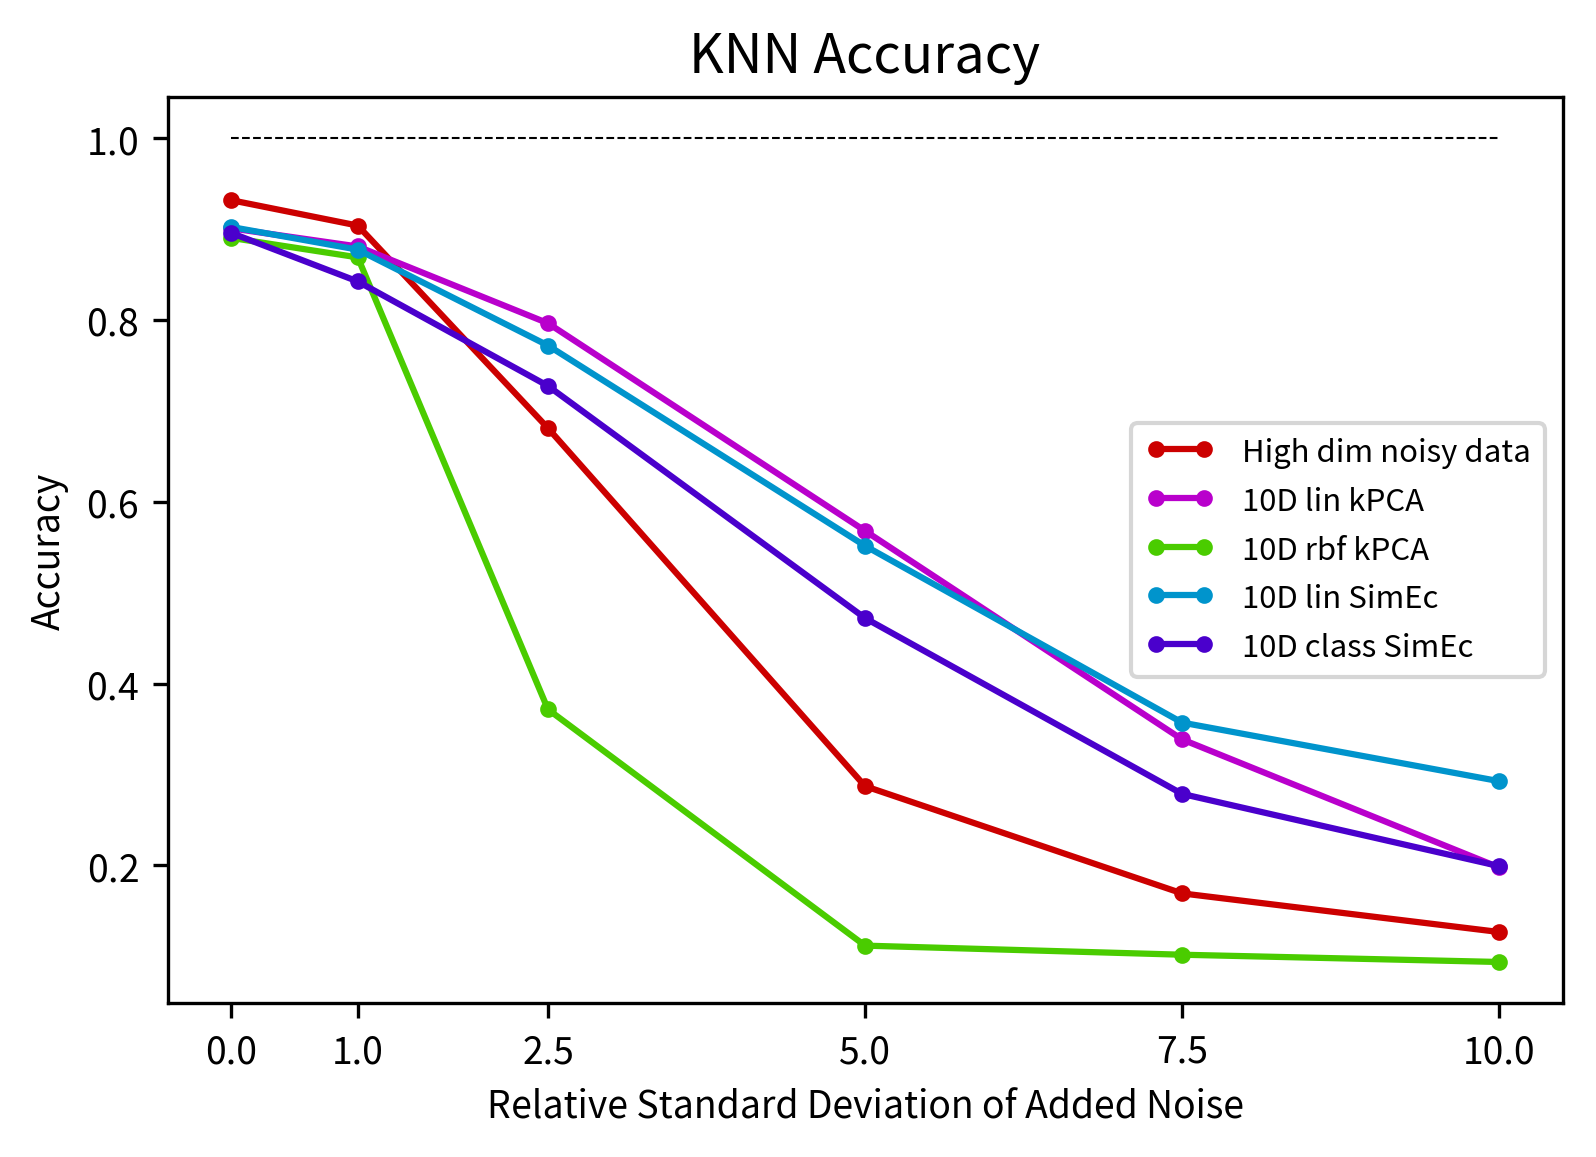

In [14]:
np.random.seed(15)
colors = get_colors(10)
noise_levels = [0., 1., 2.5, 5., 7.5, 10.]
acc_original = []
acc_lin_kpca = []
acc_rbf_kpca = []
acc_lin_simec = []
acc_class_simec = []
noise_train = np.random.randn(*X.shape)
noise_train = x_std*noise_train/np.std(noise_train)
noise_test = np.random.randn(*X_test.shape)
noise_test = x_std*noise_test/np.std(noise_test)
for noise_level in noise_levels:
    print "noise_level: %.1f" % noise_level
    # add random noise to X and X_test
    X_noisy = X + noise_level*noise_train
    X_test_noisy = X_test + noise_level*noise_test
    # compute embeddings and classification accuracy
    clf = KNN(n_neighbors=10)
    clf.fit(X_noisy, y)
    acc_original.append(clf.score(X_test_noisy, y_test))
    print "acc original: %.5f" % acc_original[-1]
    # lin kpca
    kpca = KernelPCA(n_components=10, kernel='linear')
    X_embed = kpca.fit_transform(X_noisy)
    X_embed_test = kpca.transform(X_test_noisy)
    clf = KNN(n_neighbors=10)
    clf.fit(X_embed, y)
    acc_lin_kpca.append(clf.score(X_embed_test, y_test))
    print "acc lin kpca: %.5f" % acc_lin_kpca[-1]
    # rbf kpca
    kpca = KernelPCA(n_components=10, kernel='rbf', gamma=gamma)
    X_embed = kpca.fit_transform(X_noisy)
    X_embed_test = kpca.transform(X_test_noisy)
    clf = KNN(n_neighbors=10)
    clf.fit(X_embed, y)
    acc_rbf_kpca.append(clf.score(X_embed_test, y_test))
    print "acc rbf kpca: %.5f" % acc_rbf_kpca[-1]
    # lin simec
    simec = SimilarityEncoder(X_noisy.shape[1], 10, n_targets, l2_reg_emb=0.001, l2_reg_out=0.000001, s_ll_reg=0.5, S_ll=K_lin[:n_targets, :n_targets])
    simec.fit(X_noisy, K_lin[:, :n_targets])
    X_embed = simec.transform(X_noisy)
    X_embed_test = simec.transform(X_test_noisy)
    clf = KNN(n_neighbors=10)
    clf.fit(X_embed, y)
    acc_lin_simec.append(clf.score(X_embed_test, y_test))
    print "acc lin simec: %.5f" % acc_lin_simec[-1]
    # class simec
    simec = SimilarityEncoder(X_noisy.shape[1], 10, n_targets,  hidden_layers=[(10, 'tanh')], l2_reg=0.00001, l2_reg_emb=0.001, l2_reg_out=0.00001, s_ll_reg=1., S_ll=S[:n_targets, :n_targets], opt=keras.optimizers.Adamax(lr=0.0005))
    simec.fit(X_noisy, S[:, :n_targets])
    X_embed = simec.transform(X_noisy)
    X_embed_test = simec.transform(X_test_noisy)
    clf = KNN(n_neighbors=10)
    clf.fit(X_embed, y)
    acc_class_simec.append(clf.score(X_embed_test, y_test))
    print "acc class simec: %.5f" % acc_class_simec[-1]
plt.figure();
plt.plot(noise_levels, acc_original, '-o', markersize=3, c=colors[0], label='High dim noisy data');
plt.plot(noise_levels, acc_lin_kpca, '-o', markersize=3, c=colors[-1], label='10D lin kPCA');
plt.plot(noise_levels, acc_rbf_kpca, '-o', markersize=3, c=colors[3], label='10D rbf kPCA');
plt.plot(noise_levels, acc_lin_simec, '-o', markersize=3, c=colors[6], label='10D lin SimEc');
plt.plot(noise_levels, acc_class_simec, '-o', markersize=3, c=colors[8], label='10D class SimEc');
plt.legend(loc=0);
plt.title('KNN accuracy');
plt.plot([0, noise_levels[-1]], [1,1], 'k--', linewidth=0.5);
plt.xticks(noise_levels, noise_levels);
plt.xlabel('Relative standard deviation of added noise')
plt.ylabel('Accuracy')

### Add correlated noise to input data

(784, 784)
(8000, 784)
(8000, 784)
(2000, 784)
(2000, 784)
noise_level: 0.0


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc original: 0.93200


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin kpca: 0.90100


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc rbf kpca: 0.89050
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 96.5766     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 63.6581     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 57.3036     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 54.4076     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 51.5909     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 46.4956     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 39.1389     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 31.9613     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 26.6649     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 23.0110     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 20.4707     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 18.8700     
Epoch 13/25
800

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin simec: 0.89900
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 0.1822     
Epoch 2/25
8000/8000 [==============================] - 6s - loss: 0.1583     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1458     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1340     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1211     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1080     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.0952     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.0830     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0724     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0640     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0585     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0547     
Epoch 13/25
8000/8000 [===

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc class simec: 0.88600
noise_level: 1.0


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc original: 0.86850


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin kpca: 0.87500


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc rbf kpca: 0.86850
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 98.4825     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 64.1056     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 57.5064     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 54.2760     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 50.9868     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 45.2900     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 37.7662     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 31.0492     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 25.8385     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 22.0928     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 19.8974     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 18.6105     
Epoch 13/25
800

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin simec: 0.90000
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 0.1863     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1660     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1495     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1375     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1258     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1126     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.0984     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.0843     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0718     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0619     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0552     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0514     
Epoch 13/25
8000/8000 [===

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc class simec: 0.88550
noise_level: 2.5


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc original: 0.45900


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin kpca: 0.31050


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc rbf kpca: 0.27550
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 101.1545     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 64.7662     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 57.9791     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 52.9344     
Epoch 5/25
8000/8000 [==============================] - 6s - loss: 48.2938     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 41.3742     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 33.4776     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 27.5252     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 23.6266     
Epoch 10/25
8000/8000 [==============================] - 6s - loss: 21.1952     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 19.6509     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 18.6357     
Epoch 13/25
80

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin simec: 0.89500
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 0.1891     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1737     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1600     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1492     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1387     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1252     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.1098     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.0942     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0807     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0710     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0654     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0623     
Epoch 13/25
8000/8000 [===

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc class simec: 0.87950
noise_level: 5.0


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc original: 0.17750


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin kpca: 0.11200


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc rbf kpca: 0.08600
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 108.5743     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 67.2131     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 58.6249     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 52.1175     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 45.3834     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 37.1881     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 29.9867     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 25.2332     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 22.4984     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 21.1452     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 20.2293     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 19.7453     
Epoch 13/25
80

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin simec: 0.89200
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 0.1941     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1841     
Epoch 3/25
8000/8000 [==============================] - 6s - loss: 0.1708     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1580     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1467     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1343     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.1207     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.1070     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0944     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0839     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0761     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0708     
Epoch 13/25
8000/8000 [===

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc class simec: 0.87450
noise_level: 7.5


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc original: 0.13300


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin kpca: 0.10700


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc rbf kpca: 0.09450
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 116.9536     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 74.8890     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 60.7575     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 54.3144     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 46.4861     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 38.7811     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 31.9660     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 27.3349     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 24.7089     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 22.9364     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 21.5831     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 21.1209     
Epoch 13/25
80

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin simec: 0.89050
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 0.1956     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1883     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1827     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1753     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1677     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1589     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.1481     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.1348     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.1195     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.1043     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0921     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0830     
Epoch 13/25
8000/8000 [===

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc class simec: 0.84850
noise_level: 10.0


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc original: 0.11700


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin kpca: 0.10450


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc rbf kpca: 0.10150
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 122.4767     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 81.4734     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 64.2360     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 56.4876     
Epoch 5/25
8000/8000 [==============================] - 6s - loss: 49.6117     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 41.7283     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 34.5975     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 29.4562     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 26.7444     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 24.6131     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 23.3966     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 22.7645     
Epoch 13/25
80

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin simec: 0.87450
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 0.1954     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1887     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1854     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1818     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1765     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1688     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.1591     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.1485     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.1358     
Epoch 10/25
8000/8000 [==============================] - 6s - loss: 0.1218     - ETA: 0s - loss: 0
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.1077     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0949     
Epoch 1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc class simec: 0.82650


Text(0.5,1,u'KNN Accuracy')

([<matplotlib.axis.XTick at 0x2ad091210>,
 <a list of 6 Text xticklabel objects>)

Text(0.5,0,u'Relative Standard Deviation of Added Noise')

Text(0,0.5,u'Accuracy')

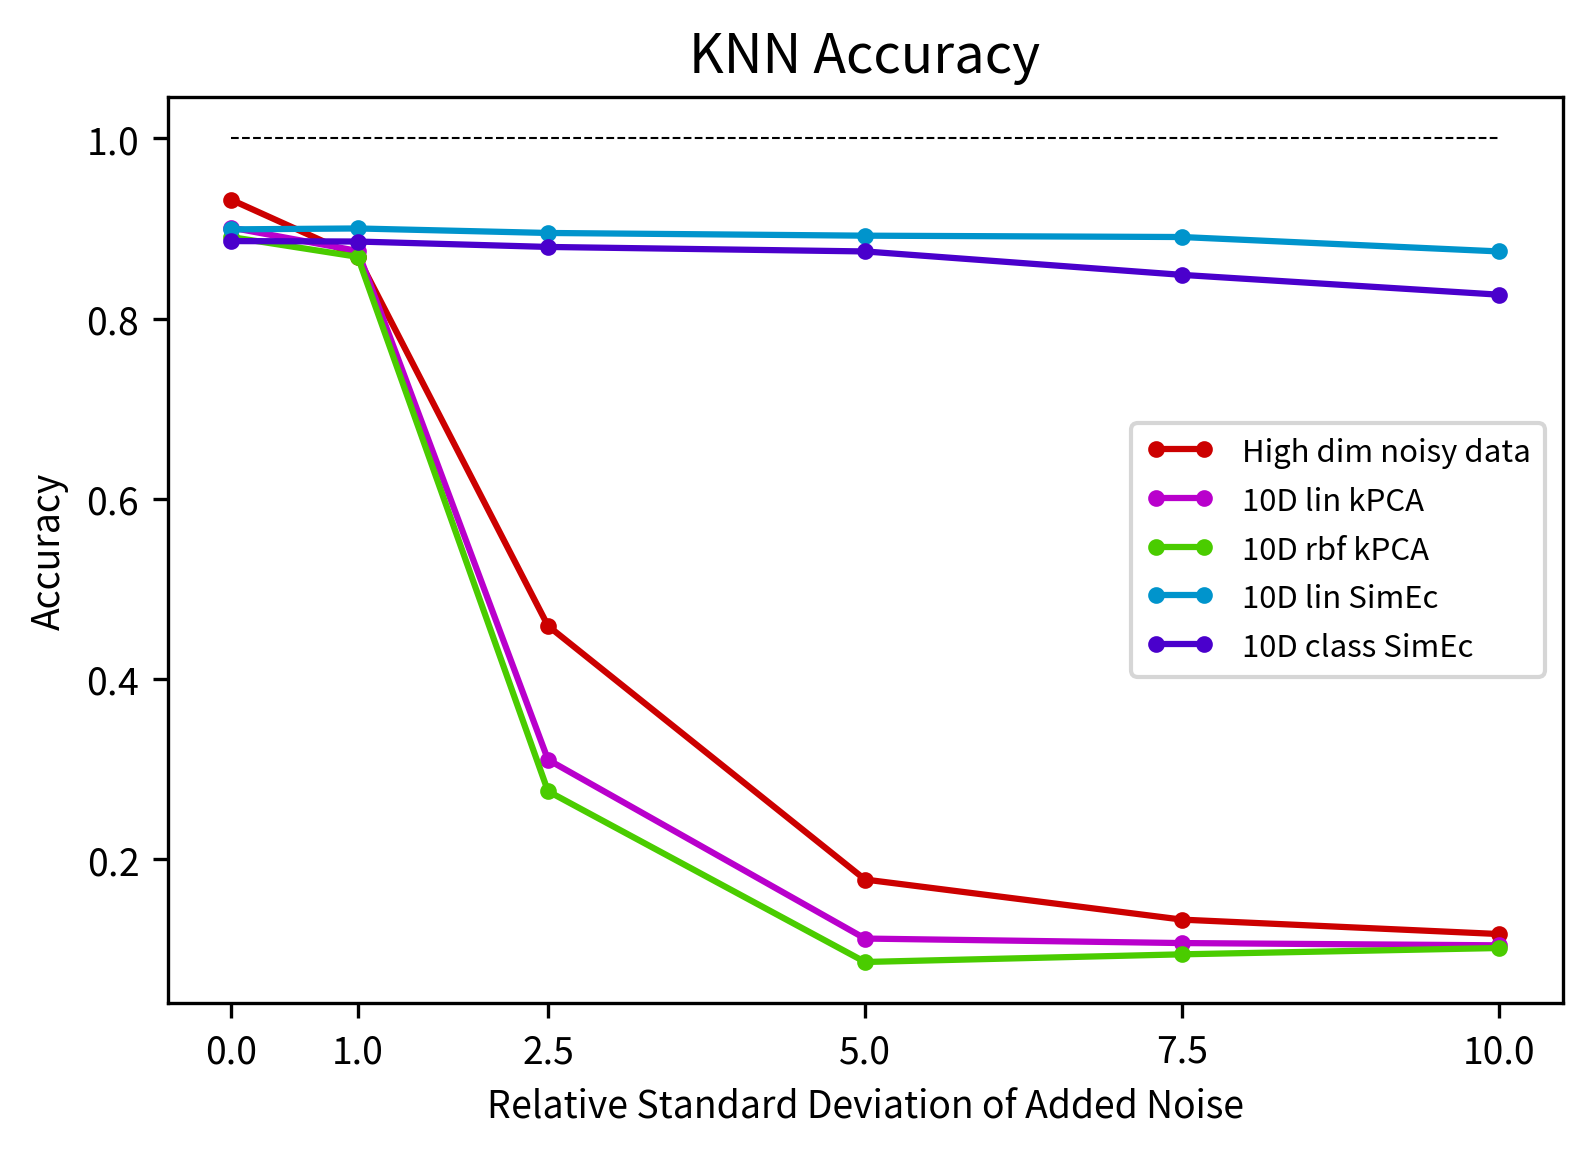

In [15]:
np.random.seed(15)
colors = get_colors(10)
noise_levels = [0., 1., 2.5, 5., 7.5, 10.]
acc_original = []
acc_lin_kpca = []
acc_rbf_kpca = []
acc_lin_simec = []
acc_class_simec = []
# generate random covariance matrix
cov = np.random.randn(X.shape[1], X.shape[1])
cov = 0.33*(cov + cov.T + np.eye(X.shape[1]))
# make sure it's positive semidefinite
D, V = np.linalg.eig(cov)
D, V = D[np.argsort(D)[::-1]], V[:, np.argsort(D)[::-1]]
cov_embed = np.dot(V, np.diag(np.sqrt(np.abs(D))))
cov = np.dot(cov_embed[:,:100], cov_embed[:,:100].T)
# generate correlated noise data
noise_train = np.random.multivariate_normal(np.zeros(X.shape[1]), cov, X.shape[0])
noise_train = x_std*noise_train/np.std(noise_train)
noise_test = np.random.multivariate_normal(np.zeros(X_test.shape[1]), cov, X_test.shape[0])
noise_test = x_std*noise_test/np.std(noise_test)
for noise_level in noise_levels:
    print "noise_level: %.1f" % noise_level
    # add random noise to X and X_test
    X_noisy = X + noise_level*noise_train
    X_test_noisy = X_test + noise_level*noise_test
    # compute embeddings and classification accuracy
    clf = KNN(n_neighbors=10)
    clf.fit(X_noisy, y)
    acc_original.append(clf.score(X_test_noisy, y_test))
    print "acc original: %.5f" % acc_original[-1]
    # lin kpca
    kpca = KernelPCA(n_components=10, kernel='linear')
    X_embed = kpca.fit_transform(X_noisy)
    X_embed_test = kpca.transform(X_test_noisy)
    clf = KNN(n_neighbors=10)
    clf.fit(X_embed, y)
    acc_lin_kpca.append(clf.score(X_embed_test, y_test))
    print "acc lin kpca: %.5f" % acc_lin_kpca[-1]
    # rbf kpca
    kpca = KernelPCA(n_components=10, kernel='rbf', gamma=gamma)
    X_embed = kpca.fit_transform(X_noisy)
    X_embed_test = kpca.transform(X_test_noisy)
    clf = KNN(n_neighbors=10)
    clf.fit(X_embed, y)
    acc_rbf_kpca.append(clf.score(X_embed_test, y_test))
    print "acc rbf kpca: %.5f" % acc_rbf_kpca[-1]
    # lin simec
    simec = SimilarityEncoder(X_noisy.shape[1], 10, n_targets, l2_reg_emb=0.001, l2_reg_out=0.000001, s_ll_reg=0.5, S_ll=K_lin[:n_targets, :n_targets])
    simec.fit(X_noisy, K_lin[:, :n_targets])
    X_embed = simec.transform(X_noisy)
    X_embed_test = simec.transform(X_test_noisy)
    clf = KNN(n_neighbors=10)
    clf.fit(X_embed, y)
    acc_lin_simec.append(clf.score(X_embed_test, y_test))
    print "acc lin simec: %.5f" % acc_lin_simec[-1]
    # class simec
    simec = SimilarityEncoder(X_noisy.shape[1], 10, n_targets,  hidden_layers=[(10, 'tanh')], l2_reg=0.00001, l2_reg_emb=0.001, l2_reg_out=0.00001, s_ll_reg=1., S_ll=S[:n_targets, :n_targets], opt=keras.optimizers.Adamax(lr=0.0005))
    simec.fit(X_noisy, S[:, :n_targets])
    X_embed = simec.transform(X_noisy)
    X_embed_test = simec.transform(X_test_noisy)
    clf = KNN(n_neighbors=10)
    clf.fit(X_embed, y)
    acc_class_simec.append(clf.score(X_embed_test, y_test))
    print "acc class simec: %.5f" % acc_class_simec[-1]
plt.figure();
plt.plot(noise_levels, acc_original, '-o', markersize=3, c=colors[0], label='High dim noisy data');
plt.plot(noise_levels, acc_lin_kpca, '-o', markersize=3, c=colors[-1], label='10D lin kPCA');
plt.plot(noise_levels, acc_rbf_kpca, '-o', markersize=3, c=colors[3], label='10D rbf kPCA');
plt.plot(noise_levels, acc_lin_simec, '-o', markersize=3, c=colors[6], label='10D lin SimEc');
plt.plot(noise_levels, acc_class_simec, '-o', markersize=3, c=colors[8], label='10D class SimEc');
plt.legend(loc=0);
plt.title('KNN accuracy');
plt.plot([0, noise_levels[-1]], [1,1], 'k--', linewidth=0.5);
plt.xticks(noise_levels, noise_levels);
plt.xlabel('Relative standard deviation of added noise')
plt.ylabel('Accuracy')

### Add additional input dimensions with random noise

noise dimensions: 0
(8000, 784)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc original: 0.93200


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin kpca: 0.90100


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc rbf kpca: 0.89050
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 95.6754     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 62.2788     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 57.0517     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 54.2885     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 51.1216     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 45.6575     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 38.0565     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 30.8689     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 25.3630     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 21.6306     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 19.3231     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 17.9439     
Epoch 13/25
800

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin simec: 0.89750
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 0.1823     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1629     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1486     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1359     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1221     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1059     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.0903     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.0768     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0662     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0587     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0538     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0503     
Epoch 13/25
8000/8000 [===

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc class simec: 0.89600
noise dimensions: 784
(8000, 1568)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc original: 0.91250


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin kpca: 0.90250


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc rbf kpca: 0.88950
Epoch 1/25
8000/8000 [==============================] - 9s - loss: 94.8928     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 63.3538     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 57.0452     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 54.3999     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 51.3062     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 45.8006     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 38.1865     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 31.1343     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 25.9769     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 22.2922     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 19.9158     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 18.5209     
Epoch 13/25
800

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin simec: 0.89200
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 0.1835     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1618     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1487     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1364     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1242     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1098     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.0944     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.0810     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0703     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0621     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0562     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0517     
Epoch 13/25
8000/8000 [===

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc class simec: 0.87150
noise dimensions: 1568
(8000, 2352)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc original: 0.90850


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin kpca: 0.90150


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc rbf kpca: 0.88600
Epoch 1/25
8000/8000 [==============================] - 8s - loss: 96.5749     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 64.0230     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 58.0075     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 55.2529     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 52.0634     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 46.7702     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 39.7431     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 33.2197     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 28.1761     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 24.3899     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 21.8324     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 20.2282     
Epoch 13/25
800

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin simec: 0.89150
Epoch 1/25
8000/8000 [==============================] - 8s - loss: 0.1839     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1632     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1499     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1380     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1257     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1117     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.0976     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.0843     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0731     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0645     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0571     
Epoch 12/25
8000/8000 [==============================] - 6s - loss: 0.0507     
Epoch 13/25
8000/8000 [===

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc class simec: 0.84950
noise dimensions: 3136
(8000, 3920)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc original: 0.89200


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin kpca: 0.89800


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc rbf kpca: 0.86750
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 95.9504     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 63.8479     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 57.3702     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 54.4728     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 51.6228     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 46.9349     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 40.1865     
Epoch 8/25
8000/8000 [==============================] - 6s - loss: 33.6063     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 28.7036     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 25.2283     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 22.7889     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 21.1990     
Epoch 13/25
800

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin simec: 0.89150
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 0.1851     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1635     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1488     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1361     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1216     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1051     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.0892     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.0765     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0670     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0585     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0501     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0435     
Epoch 13/25
8000/8000 [===

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc class simec: 0.80400
noise dimensions: 4704
(8000, 5488)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc original: 0.87250


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin kpca: 0.89600


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc rbf kpca: 0.30100
Epoch 1/25
8000/8000 [==============================] - 9s - loss: 95.2616     
Epoch 2/25
8000/8000 [==============================] - 6s - loss: 64.3760     
Epoch 3/25
8000/8000 [==============================] - 6s - loss: 57.7225     
Epoch 4/25
8000/8000 [==============================] - 6s - loss: 54.5799     
Epoch 5/25
8000/8000 [==============================] - 6s - loss: 51.9279     
Epoch 6/25
8000/8000 [==============================] - 6s - loss: 47.7574     
Epoch 7/25
8000/8000 [==============================] - 6s - loss: 41.6912     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 35.3877      ETA: 0s -
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 30.4757     
Epoch 10/25
8000/8000 [==============================] - 6s - loss: 27.0378     
Epoch 11/25
8000/8000 [==============================] - 6s - loss: 24.4247     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 22.8236     
Epoch

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin simec: 0.88800
Epoch 1/25
8000/8000 [==============================] - 8s - loss: 0.1825     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1597     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1465     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1326     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1162     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.0998     
Epoch 7/25
8000/8000 [==============================] - 6s - loss: 0.0837     - ETA: 0s -
Epoch 8/25
8000/8000 [==============================] - 6s - loss: 0.0700     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0591     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0495     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0415     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0360     - ETA: 0s - lo
E

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc class simec: 0.76500
noise dimensions: 6272
(8000, 7056)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc original: 0.86300


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin kpca: 0.89750


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc rbf kpca: 0.11150
Epoch 1/25
8000/8000 [==============================] - 8s - loss: 95.1535     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 63.2101     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 56.8993     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 54.2960     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 51.7399     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 47.7980     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 42.0298     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 36.1634     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 31.4093     
Epoch 10/25
8000/8000 [==============================] - 6s - loss: 28.0681     
Epoch 11/25
8000/8000 [==============================] - 6s - loss: 25.8534     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 24.3484     
Epoch 13/25
800

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin simec: 0.87900
Epoch 1/25
8000/8000 [==============================] - 8s - loss: 0.1847     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1627     - ETA:  - ETA: 0s - loss: 
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1458     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1306     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1143     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.0974     
Epoch 7/25
8000/8000 [==============================] - 6s - loss: 0.0793     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.0616     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0482     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0402     - E
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0352     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0314   

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc class simec: 0.74000
noise dimensions: 7840
(8000, 8624)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc original: 0.85700


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin kpca: 0.89800


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc rbf kpca: 0.15400
Epoch 1/25
8000/8000 [==============================] - 8s - loss: 95.7903     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 64.1621     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 58.7813     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 55.3950     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 53.0509     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 50.1953     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 45.5701     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 40.2225     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 35.2513     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 31.4246     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 28.6293     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 26.6052     
Epoch 13/25
800

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin simec: 0.86350
Epoch 1/25
8000/8000 [==============================] - 8s - loss: 0.1839     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1616     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1467     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1325     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1162     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.0974     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.0783     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.0623     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0499     
Epoch 10/25
8000/8000 [==============================] - 7s - loss: 0.0406     
Epoch 11/25
8000/8000 [==============================] - 6s - loss: 0.0337     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0288     
Epoch 13/25
8000/8000 [===

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc class simec: 0.72250


Text(0.5,1,u'KNN Accuracy')

([<matplotlib.axis.XTick at 0x2c4305710>,
 <a list of 7 Text xticklabel objects>)

Text(0.5,0,u'Additional Noise Dimensions (where $D = 784$)')

Text(0,0.5,u'Accuracy')

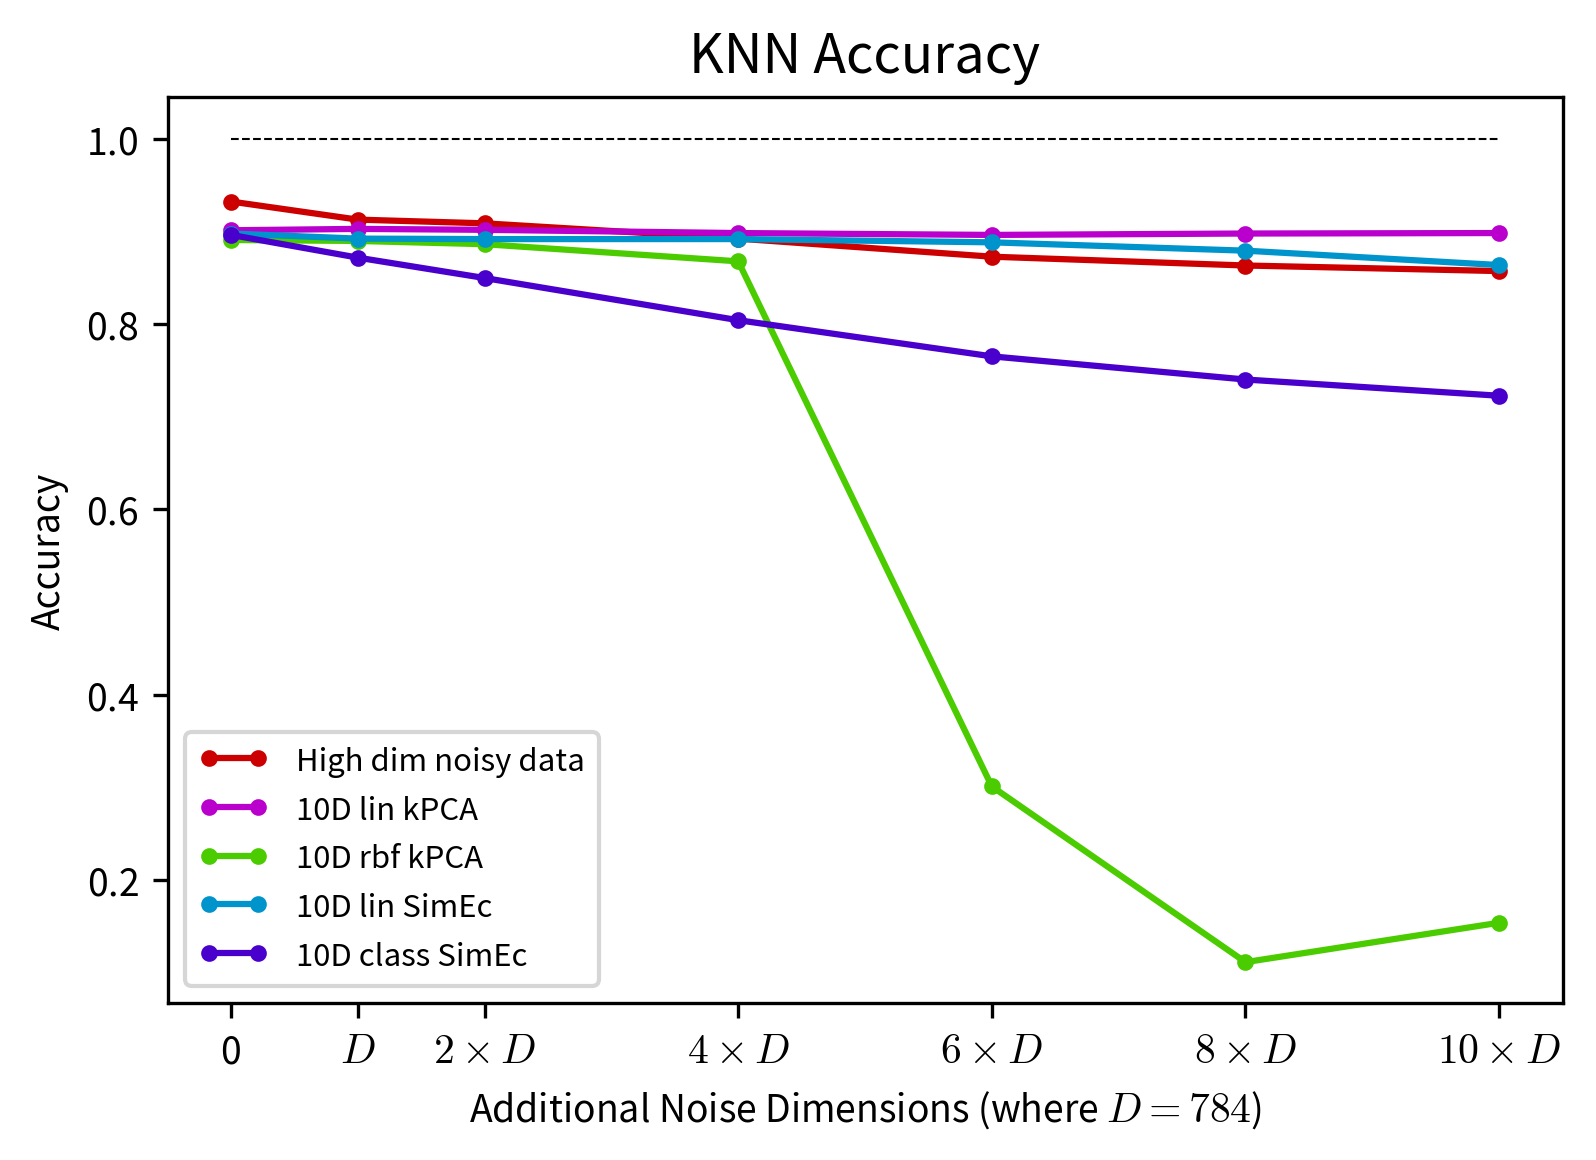

In [16]:
np.random.seed(15)
colors = get_colors(10)
noise_levels = [0, X.shape[1], 2*X.shape[1], 4*X.shape[1], 6*X.shape[1], 8*X.shape[1], 10*X.shape[1]]
acc_original = []
acc_lin_kpca = []
acc_rbf_kpca = []
acc_lin_simec = []
acc_class_simec = []
noise_train = np.random.randn(X.shape[0], max(noise_levels))
noise_train = x_std*noise_train/np.std(noise_train)
noise_test = np.random.randn(X_test.shape[0], max(noise_levels))
noise_test = x_std*noise_test/np.std(noise_test)
for noise_level in noise_levels:
    print "noise dimensions: %i" % noise_level
    # add random noise as additional feature dimensions
    X_noisy = np.hstack((X, noise_train[:,:noise_level]))
    X_test_noisy = np.hstack((X_test, noise_test[:,:noise_level]))
    # compute embeddings and classification accuracy
    clf = KNN(n_neighbors=10)
    clf.fit(X_noisy, y)
    acc_original.append(clf.score(X_test_noisy, y_test))
    print "acc original: %.5f" % acc_original[-1]
    # lin kpca
    kpca = KernelPCA(n_components=10, kernel='linear')
    X_embed = kpca.fit_transform(X_noisy)
    X_embed_test = kpca.transform(X_test_noisy)
    clf = KNN(n_neighbors=10)
    clf.fit(X_embed, y)
    acc_lin_kpca.append(clf.score(X_embed_test, y_test))
    print "acc lin kpca: %.5f" % acc_lin_kpca[-1]
    # rbf kpca
    kpca = KernelPCA(n_components=10, kernel='rbf', gamma=gamma)
    X_embed = kpca.fit_transform(X_noisy)
    X_embed_test = kpca.transform(X_test_noisy)
    clf = KNN(n_neighbors=10)
    clf.fit(X_embed, y)
    acc_rbf_kpca.append(clf.score(X_embed_test, y_test))
    print "acc rbf kpca: %.5f" % acc_rbf_kpca[-1]
    # lin simec
    simec = SimilarityEncoder(X_noisy.shape[1], 10, n_targets, l2_reg_emb=0.001, l2_reg_out=0.000001, s_ll_reg=0.5, S_ll=K_lin[:n_targets, :n_targets])
    simec.fit(X_noisy, K_lin[:, :n_targets])
    X_embed = simec.transform(X_noisy)
    X_embed_test = simec.transform(X_test_noisy)
    clf = KNN(n_neighbors=10)
    clf.fit(X_embed, y)
    acc_lin_simec.append(clf.score(X_embed_test, y_test))
    print "acc lin simec: %.5f" % acc_lin_simec[-1]
    # class simec
    simec = SimilarityEncoder(X_noisy.shape[1], 10, n_targets,  hidden_layers=[(10, 'tanh')], l2_reg=0.00001, l2_reg_emb=0.001, l2_reg_out=0.00001, s_ll_reg=1., S_ll=S[:n_targets, :n_targets], opt=keras.optimizers.Adamax(lr=0.0005))
    simec.fit(X_noisy, S[:, :n_targets])
    X_embed = simec.transform(X_noisy)
    X_embed_test = simec.transform(X_test_noisy)
    clf = KNN(n_neighbors=10)
    clf.fit(X_embed, y)
    acc_class_simec.append(clf.score(X_embed_test, y_test))
    print "acc class simec: %.5f" % acc_class_simec[-1]
plt.figure();
plt.plot(noise_levels, acc_original, '-o', markersize=3, c=colors[0], label='High dim noisy data');
plt.plot(noise_levels, acc_lin_kpca, '-o', markersize=3, c=colors[-1], label='10D lin kPCA');
plt.plot(noise_levels, acc_rbf_kpca, '-o', markersize=3, c=colors[3], label='10D rbf kPCA');
plt.plot(noise_levels, acc_lin_simec, '-o', markersize=3, c=colors[6], label='10D lin SimEc');
plt.plot(noise_levels, acc_class_simec, '-o', markersize=3, c=colors[8], label='10D class SimEc');
plt.legend(loc=0);
plt.title('KNN accuracy');
plt.plot([0, noise_levels[-1]], [1,1], 'k--', linewidth=0.5);
plt.xticks(noise_levels, [0, '$D$', '$2\\times D$', '$4\\times D$', '$6\\times D$', '$8\\times D$', '$10\\times D$']);
plt.xlabel('Additional noise dimensions (where $D = 784$)')
plt.ylabel('Accuracy')

### Add additional input dimensions with correlated noise

(7840, 7840)
(8000, 784)
(8000, 7840)
(2000, 784)
(2000, 7840)
noise dimensions: 0
(8000, 784)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc original: 0.93200


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin kpca: 0.90100


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc rbf kpca: 0.89050
Epoch 1/25
8000/8000 [==============================] - 10s - loss: 94.0575    
Epoch 2/25
8000/8000 [==============================] - 6s - loss: 62.2301     
Epoch 3/25
8000/8000 [==============================] - 6s - loss: 57.2716     
Epoch 4/25
8000/8000 [==============================] - 6s - loss: 54.3629     
Epoch 5/25
8000/8000 [==============================] - 6s - loss: 50.9765     
Epoch 6/25
8000/8000 [==============================] - 6s - loss: 45.3016     
Epoch 7/25
8000/8000 [==============================] - 6s - loss: 37.7023     
Epoch 8/25
8000/8000 [==============================] - 6s - loss: 30.8304     
Epoch 9/25
8000/8000 [==============================] - 6s - loss: 25.5970     
Epoch 10/25
8000/8000 [==============================] - 6s - loss: 21.7732     
Epoch 11/25
8000/8000 [==============================] - 6s - loss: 19.3019     
Epoch 12/25
8000/8000 [==============================] - 6s - loss: 17.9283     
Epoch 13/25
800

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin simec: 0.89750
Epoch 1/25
8000/8000 [==============================] - 10s - loss: 0.1819    
Epoch 2/25
8000/8000 [==============================] - 8s - loss: 0.1593     
Epoch 3/25
8000/8000 [==============================] - 7s - loss: 0.1449     
Epoch 4/25
8000/8000 [==============================] - 7s - loss: 0.1329     
Epoch 5/25
8000/8000 [==============================] - 7s - loss: 0.1194     
Epoch 6/25
8000/8000 [==============================] - 6s - loss: 0.1037     
Epoch 7/25
8000/8000 [==============================] - 6s - loss: 0.0882     
Epoch 8/25
8000/8000 [==============================] - 6s - loss: 0.0755     
Epoch 9/25
8000/8000 [==============================] - 6s - loss: 0.0665     
Epoch 10/25
8000/8000 [==============================] - 6s - loss: 0.0608     
Epoch 11/25
8000/8000 [==============================] - 6s - loss: 0.0565     
Epoch 12/25
8000/8000 [==============================] - 7s - loss: 0.0523     
Epoch 13/25
8000/8000 [===

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc class simec: 0.88500
noise dimensions: 784
(8000, 1568)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc original: 0.86700


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin kpca: 0.89850


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc rbf kpca: 0.88050
Epoch 1/25
8000/8000 [==============================] - 9s - loss: 95.6454     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 63.2859     
Epoch 3/25
8000/8000 [==============================] - 6s - loss: 56.5271     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 54.1378     
Epoch 5/25
8000/8000 [==============================] - 6s - loss: 51.1934     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 45.8171      ETA
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 38.1309     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 30.8811     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 25.7602     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 22.3611     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 20.1203     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 18.6582     
Epoch 13/25

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin simec: 0.89500
Epoch 1/25
8000/8000 [==============================] - 9s - loss: 0.1814     
Epoch 2/25
8000/8000 [==============================] - 6s - loss: 0.1599     
Epoch 3/25
8000/8000 [==============================] - 6s - loss: 0.1459     
Epoch 4/25
8000/8000 [==============================] - 7s - loss: 0.1313     
Epoch 5/25
8000/8000 [==============================] - 6s - loss: 0.1174     
Epoch 6/25
8000/8000 [==============================] - 6s - loss: 0.1032     
Epoch 7/25
8000/8000 [==============================] - 6s - loss: 0.0896     
Epoch 8/25
8000/8000 [==============================] - 6s - loss: 0.0779     - ETA: 0s - loss: 0
Epoch 9/25
8000/8000 [==============================] - 6s - loss: 0.0685     
Epoch 10/25
8000/8000 [==============================] - 6s - loss: 0.0618     
Epoch 11/25
8000/8000 [==============================] - 6s - loss: 0.0569     
Epoch 12/25
8000/8000 [==============================] - 6s - loss: 0.0523     
Epoch 1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc class simec: 0.88600
noise dimensions: 1568
(8000, 2352)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc original: 0.78500


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin kpca: 0.83250


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc rbf kpca: 0.82950
Epoch 1/25
8000/8000 [==============================] - 9s - loss: 95.5049     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 63.0357     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 57.1558     
Epoch 4/25
8000/8000 [==============================] - 6s - loss: 54.5236     
Epoch 5/25
8000/8000 [==============================] - 8s - loss: 51.1696     
Epoch 6/25
8000/8000 [==============================] - 6s - loss: 45.5510     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 38.0107     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 31.0782     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 26.0142     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 22.5319     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 20.2704     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 19.1437     
Epoch 13/25
800

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin simec: 0.89200
Epoch 1/25
8000/8000 [==============================] - 8s - loss: 0.1796     - ETA: 0s - loss: 0
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1572     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1399     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1253     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1112     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.0966     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.0833     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.0721     - ETA: 
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0628     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0552     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0499     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0474     -

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc class simec: 0.89200
noise dimensions: 3136
(8000, 3920)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc original: 0.61400


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin kpca: 0.54200


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc rbf kpca: 0.56250
Epoch 1/25
8000/8000 [==============================] - 8s - loss: 97.8576     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 65.1494     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 58.2941     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 55.1994     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 52.4739     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 48.2652     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 41.9855     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 35.3834     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 29.7978     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 25.9005     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 23.0844     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 21.4042     
Epoch 13/25
800

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin simec: 0.89300
Epoch 1/25
8000/8000 [==============================] - 8s - loss: 0.1818     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1598     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1439     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1301     - ETA: 1s - loss: 0.1 - ETA: 0s 
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1155     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1008     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.0873     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.0760     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0674     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0613     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0561     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0516

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc class simec: 0.88350
noise dimensions: 4704
(8000, 5488)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc original: 0.48200


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin kpca: 0.28350


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc rbf kpca: 0.24350
Epoch 1/25
8000/8000 [==============================] - 8s - loss: 96.3639     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 65.5166     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 57.5899     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 54.6717     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 52.2191     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 48.0476     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 41.7170     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 35.1812     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 30.1950     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 26.7900     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 24.2263     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 22.1521     
Epoch 13/25
800

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin simec: 0.88850
Epoch 1/25
8000/8000 [==============================] - 8s - loss: 0.1810     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1625     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1508     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1383     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1242     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1081     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.0918     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.0778     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0676     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0614     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0570     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0531     
Epoch 13/25
8000/8000 [===

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc class simec: 0.88050
noise dimensions: 6272
(8000, 7056)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc original: 0.40450


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin kpca: 0.20100


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc rbf kpca: 0.10700
Epoch 1/25
8000/8000 [==============================] - 8s - loss: 96.5025     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 64.2039     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 57.8963     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 55.2217     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 53.0793      ETA: 0s - los
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 49.4420     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 43.4844     
Epoch 8/25
8000/8000 [==============================] - ETA: 0s - loss: 37.11 - 5s - loss: 37.0870     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 31.9272     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 27.9529     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 25.1360     
Epoch 12/25
8000/8000 [==============================] - 5

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin simec: 0.87700
Epoch 1/25
8000/8000 [==============================] - 8s - loss: 0.1819     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1620     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1472     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1341     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1201     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1038     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.0877     
Epoch 8/25
8000/8000 [==============================] - 6s - loss: 0.0744     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0647     
Epoch 10/25
8000/8000 [==============================] - 6s - loss: 0.0589     
Epoch 11/25
8000/8000 [==============================] - 7s - loss: 0.0555     
Epoch 12/25
8000/8000 [==============================] - 6s - loss: 0.0528     
Epoch 13/25
8000/8000 [===

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc class simec: 0.87550
noise dimensions: 7840
(8000, 8624)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc original: 0.33600


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin kpca: 0.09950


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc rbf kpca: 0.09750
Epoch 1/25
8000/8000 [==============================] - 8s - loss: 99.7090     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 66.4065     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 57.6800     
Epoch 4/25
8000/8000 [==============================] - 6s - loss: 55.1442     
Epoch 5/25
8000/8000 [==============================] - 7s - loss: 53.5097     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 50.5069     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 45.9041     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 40.2023     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 35.2728     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 30.7108     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 28.1601      ETA: 0s - loss:
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 25.8864     

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc lin simec: 0.87500
Epoch 1/25
8000/8000 [==============================] - 8s - loss: 0.1826     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1615     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1483     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1378     
Epoch 5/25
8000/8000 [==============================] - 6s - loss: 0.1274     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1152     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.1013     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.0872     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0751     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0657     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0577     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0520     
Epoch 13/25
8000/8000 [===

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

acc class simec: 0.87650


Text(0.5,1,u'KNN Accuracy')

([<matplotlib.axis.XTick at 0x2ff4bef50>,
 <a list of 7 Text xticklabel objects>)

Text(0.5,0,u'Additional Noise Dimensions (where $D = 784$)')

Text(0,0.5,u'Accuracy')

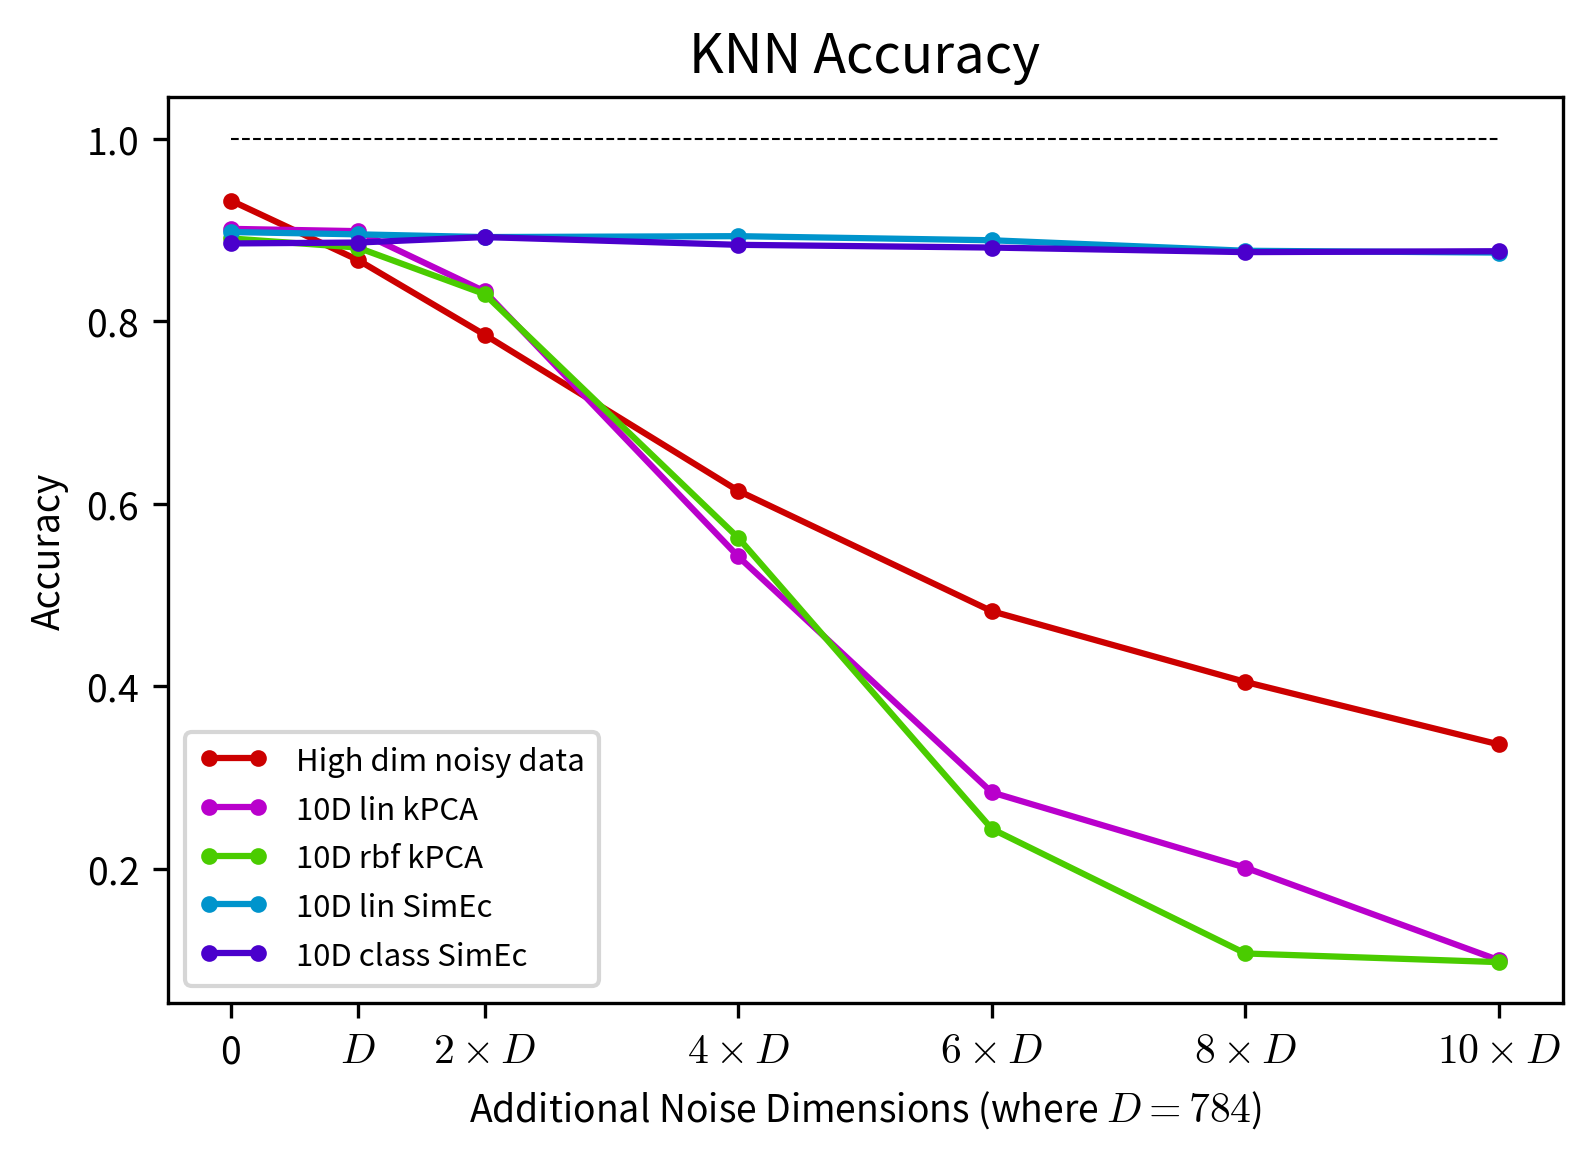

In [17]:
np.random.seed(15)
colors = get_colors(10)
noise_levels = [0, X.shape[1], 2*X.shape[1], 4*X.shape[1], 6*X.shape[1], 8*X.shape[1], 10*X.shape[1]]
acc_original = []
acc_lin_kpca = []
acc_rbf_kpca = []
acc_lin_simec = []
acc_class_simec = []
# generate random covariance matrix
cov = np.random.randn(max(noise_levels), max(noise_levels))
cov = 0.33*(cov + cov.T + np.eye(max(noise_levels)))
# make sure it's positive semidefinite
D, V = np.linalg.eig(cov)
D, V = D[np.argsort(D)[::-1]], V[:, np.argsort(D)[::-1]]
cov_embed = np.dot(V, np.diag(np.sqrt(np.abs(D))))
cov = np.dot(cov_embed[:,:100], cov_embed[:,:100].T)
# generate correlated noise data
noise_train = np.random.multivariate_normal(np.zeros(max(noise_levels)), cov, X.shape[0])
noise_train = x_std*noise_train/np.std(noise_train)
noise_test = np.random.multivariate_normal(np.zeros(max(noise_levels)), cov, X_test.shape[0])
noise_test = x_std*noise_test/np.std(noise_test)
for noise_level in noise_levels:
    print "noise dimensions: %i" % noise_level
    # add random noise as additional feature dimensions
    X_noisy = np.hstack((X, noise_train[:,:noise_level]))
    X_test_noisy = np.hstack((X_test, noise_test[:,:noise_level]))
    # compute embeddings and classification accuracy
    clf = KNN(n_neighbors=10)
    clf.fit(X_noisy, y)
    acc_original.append(clf.score(X_test_noisy, y_test))
    print "acc original: %.5f" % acc_original[-1]
    # lin kpca
    kpca = KernelPCA(n_components=10, kernel='linear')
    X_embed = kpca.fit_transform(X_noisy)
    X_embed_test = kpca.transform(X_test_noisy)
    clf = KNN(n_neighbors=10)
    clf.fit(X_embed, y)
    acc_lin_kpca.append(clf.score(X_embed_test, y_test))
    print "acc lin kpca: %.5f" % acc_lin_kpca[-1]
    # rbf kpca
    kpca = KernelPCA(n_components=10, kernel='rbf', gamma=gamma)
    X_embed = kpca.fit_transform(X_noisy)
    X_embed_test = kpca.transform(X_test_noisy)
    clf = KNN(n_neighbors=10)
    clf.fit(X_embed, y)
    acc_rbf_kpca.append(clf.score(X_embed_test, y_test))
    print "acc rbf kpca: %.5f" % acc_rbf_kpca[-1]
    # lin simec
    simec = SimilarityEncoder(X_noisy.shape[1], 10, n_targets, l2_reg_emb=0.001, l2_reg_out=0.000001, s_ll_reg=0.5, S_ll=K_lin[:n_targets, :n_targets])
    simec.fit(X_noisy, K_lin[:, :n_targets])
    X_embed = simec.transform(X_noisy)
    X_embed_test = simec.transform(X_test_noisy)
    clf = KNN(n_neighbors=10)
    clf.fit(X_embed, y)
    acc_lin_simec.append(clf.score(X_embed_test, y_test))
    print "acc lin simec: %.5f" % acc_lin_simec[-1]
    # class simec
    simec = SimilarityEncoder(X_noisy.shape[1], 10, n_targets,  hidden_layers=[(10, 'tanh')], l2_reg=0.00001, l2_reg_emb=0.001, l2_reg_out=0.00001, s_ll_reg=1., S_ll=S[:n_targets, :n_targets], opt=keras.optimizers.Adamax(lr=0.0005))
    simec.fit(X_noisy, S[:, :n_targets])
    X_embed = simec.transform(X_noisy)
    X_embed_test = simec.transform(X_test_noisy)
    clf = KNN(n_neighbors=10)
    clf.fit(X_embed, y)
    acc_class_simec.append(clf.score(X_embed_test, y_test))
    print "acc class simec: %.5f" % acc_class_simec[-1]
plt.figure();
plt.plot(noise_levels, acc_original, '-o', markersize=3, c=colors[0], label='High dim noisy data');
plt.plot(noise_levels, acc_lin_kpca, '-o', markersize=3, c=colors[-1], label='10D lin kPCA');
plt.plot(noise_levels, acc_rbf_kpca, '-o', markersize=3, c=colors[3], label='10D rbf kPCA');
plt.plot(noise_levels, acc_lin_simec, '-o', markersize=3, c=colors[6], label='10D lin SimEc');
plt.plot(noise_levels, acc_class_simec, '-o', markersize=3, c=colors[8], label='10D class SimEc');
plt.legend(loc=0);
plt.title('KNN accuracy');
plt.plot([0, noise_levels[-1]], [1,1], 'k--', linewidth=0.5);
plt.xticks(noise_levels, [0, '$D$', '$2\\times D$', '$4\\times D$', '$6\\times D$', '$8\\times D$', '$10\\times D$']);
plt.xlabel('Additional noise dimensions (where $D = 784$)')
plt.ylabel('Accuracy')

## Same experiments: noisy input data with SVC instead of KNN

noise_level: 0.0


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc original: 0.90350


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin kpca: 0.92050


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc rbf kpca: 0.79950
Epoch 1/25
8000/8000 [==============================] - 5s - loss: 93.4696     
Epoch 2/25
8000/8000 [==============================] - 4s - loss: 63.1223     
Epoch 3/25
8000/8000 [==============================] - 4s - loss: 57.1090     
Epoch 4/25
8000/8000 [==============================] - 4s - loss: 54.4058     
Epoch 5/25
8000/8000 [==============================] - 4s - loss: 51.1972     
Epoch 6/25
8000/8000 [==============================] - 4s - loss: 45.5571     
Epoch 7/25
8000/8000 [==============================] - 4s - loss: 37.9239     
Epoch 8/25
8000/8000 [==============================] - 4s - loss: 31.0335     
Epoch 9/25
8000/8000 [==============================] - 4s - loss: 25.8745     
Epoch 10/25
8000/8000 [==============================] - 4s - loss: 22.1649     
Epoch 11/25
8000/8000 [==============================] - 4s - loss: 19.6587     
Epoch 12/25
8000/8000 [==============================] - 4s - loss: 18.1138     
Epoch 13/25
800

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin simec: 0.91900
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 0.1812     
Epoch 2/25
8000/8000 [==============================] - 4s - loss: 0.1613     
Epoch 3/25
8000/8000 [==============================] - 4s - loss: 0.1471     
Epoch 4/25
8000/8000 [==============================] - 4s - loss: 0.1338     
Epoch 5/25
8000/8000 [==============================] - 4s - loss: 0.1201     
Epoch 6/25
8000/8000 [==============================] - 4s - loss: 0.1055     
Epoch 7/25
8000/8000 [==============================] - 4s - loss: 0.0914     
Epoch 8/25
8000/8000 [==============================] - 4s - loss: 0.0788     
Epoch 9/25
8000/8000 [==============================] - 4s - loss: 0.0681     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0600     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0544     - ETA: 3s - lo - ET
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0504     
Epoch 1

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc class simec: 0.88650
noise_level: 1.0


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc original: 0.88600


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin kpca: 0.90400


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc rbf kpca: 0.71700
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 96.2595     
Epoch 2/25
8000/8000 [==============================] - 4s - loss: 64.8496     
Epoch 3/25
8000/8000 [==============================] - 4s - loss: 58.7310     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 55.5006     
Epoch 5/25
8000/8000 [==============================] - 4s - loss: 52.2341     
Epoch 6/25
8000/8000 [==============================] - 4s - loss: 46.7582     
Epoch 7/25
8000/8000 [==============================] - 4s - loss: 39.6288     
Epoch 8/25
8000/8000 [==============================] - 4s - loss: 33.3975     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 29.1332     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 26.1640     
Epoch 11/25
8000/8000 [==============================] - 4s - loss: 23.9830     
Epoch 12/25
8000/8000 [==============================] - 4s - loss: 22.4450     
Epoch 13/25
800

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin simec: 0.89900
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 0.1863     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1659     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1519     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1416     
Epoch 5/25
8000/8000 [==============================] - 4s - loss: 0.1326     
Epoch 6/25
8000/8000 [==============================] - 4s - loss: 0.1226     
Epoch 7/25
8000/8000 [==============================] - 4s - loss: 0.1118     
Epoch 8/25
8000/8000 [==============================] - 4s - loss: 0.1001     
Epoch 9/25
8000/8000 [==============================] - 4s - loss: 0.0880     
Epoch 10/25
8000/8000 [==============================] - 4s - loss: 0.0769     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0683     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0619     
Epoch 13/25
8000/8000 [===

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc class simec: 0.85200
noise_level: 2.5


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc original: 0.81650


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin kpca: 0.82150


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc rbf kpca: 0.11450
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 105.0633     
Epoch 2/25
8000/8000 [==============================] - 4s - loss: 75.2539     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 68.8446     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 64.8213     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 62.2433     
Epoch 6/25
8000/8000 [==============================] - 4s - loss: 58.6866     
Epoch 7/25
8000/8000 [==============================] - 4s - loss: 53.6905     
Epoch 8/25
8000/8000 [==============================] - 4s - loss: 47.7859     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 42.6359     
Epoch 10/25
8000/8000 [==============================] - 4s - loss: 38.8546     
Epoch 11/25
8000/8000 [==============================] - 4s - loss: 36.1604     
Epoch 12/25
8000/8000 [==============================] - 4s - loss: 34.0182     
Epoch 13/25
80

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin simec: 0.80200
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 0.1913     
Epoch 2/25
8000/8000 [==============================] - 4s - loss: 0.1765     
Epoch 3/25
8000/8000 [==============================] - 4s - loss: 0.1648     
Epoch 4/25
8000/8000 [==============================] - 4s - loss: 0.1574     
Epoch 5/25
8000/8000 [==============================] - 4s - loss: 0.1506     
Epoch 6/25
8000/8000 [==============================] - 4s - loss: 0.1427     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.1335     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.1223     - ETA:
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.1092     
Epoch 10/25
8000/8000 [==============================] - 4s - loss: 0.0963     
Epoch 11/25
8000/8000 [==============================] - 4s - loss: 0.0858     
Epoch 12/25
8000/8000 [==============================] - 4s - loss: 0.0781     
Epoch 13/25
8000/800

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc class simec: 0.74450
noise_level: 5.0


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc original: 0.62450


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin kpca: 0.59700


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc rbf kpca: 0.11450
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 116.1882     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 91.4803     
Epoch 3/25
8000/8000 [==============================] - 4s - loss: 86.8518     
Epoch 4/25
8000/8000 [==============================] - 4s - loss: 84.9406     
Epoch 5/25
8000/8000 [==============================] - 4s - loss: 83.1617     
Epoch 6/25
8000/8000 [==============================] - 4s - loss: 81.6821     
Epoch 7/25
8000/8000 [==============================] - 4s - loss: 80.2716     
Epoch 8/25
8000/8000 [==============================] - 4s - loss: 78.6495     
Epoch 9/25
8000/8000 [==============================] - 4s - loss: 76.4687     
Epoch 10/25
8000/8000 [==============================] - 4s - loss: 73.3251     
Epoch 11/25
8000/8000 [==============================] - 4s - loss: 69.1451     
Epoch 12/25
8000/8000 [==============================] - 4s - loss: 64.4552     
Epoch 13/25
80

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin simec: 0.57150
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 0.1944     
Epoch 2/25
8000/8000 [==============================] - 4s - loss: 0.1868     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1807     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1750     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1700     
Epoch 6/25
8000/8000 [==============================] - 4s - loss: 0.1649     
Epoch 7/25
8000/8000 [==============================] - 4s - loss: 0.1587     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.1503     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.1396     
Epoch 10/25
8000/8000 [==============================] - 4s - loss: 0.1274     
Epoch 11/25
8000/8000 [==============================] - 4s - loss: 0.1154     
Epoch 12/25
8000/8000 [==============================] - 4s - loss: 0.1052     
Epoch 13/25
8000/8000 [===

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc class simec: 0.49250
noise_level: 7.5


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc original: 0.16450


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin kpca: 0.38100


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc rbf kpca: 0.11450
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 124.6915     
Epoch 2/25
8000/8000 [==============================] - 4s - loss: 107.0576     
Epoch 3/25
8000/8000 [==============================] - 4s - loss: 102.5551     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 100.7399     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 99.8102     
Epoch 6/25
8000/8000 [==============================] - 4s - loss: 99.0639     
Epoch 7/25
8000/8000 [==============================] - 4s - loss: 98.5010     
Epoch 8/25
8000/8000 [==============================] - 4s - loss: 98.0601     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 97.8079     
Epoch 10/25
8000/8000 [==============================] - 4s - loss: 97.4624     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 97.1728     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 96.9169     
Epoch 13/25

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin simec: 0.40000
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 0.1961     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1890     
Epoch 3/25
8000/8000 [==============================] - 4s - loss: 0.1856     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1821     
Epoch 5/25
8000/8000 [==============================] - 4s - loss: 0.1784     
Epoch 6/25
8000/8000 [==============================] - 4s - loss: 0.1743     
Epoch 7/25
8000/8000 [==============================] - 4s - loss: 0.1697     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.1638     
Epoch 9/25
8000/8000 [==============================] - 4s - loss: 0.1560     
Epoch 10/25
8000/8000 [==============================] - 4s - loss: 0.1462     
Epoch 11/25
8000/8000 [==============================] - 4s - loss: 0.1346     
Epoch 12/25
8000/8000 [==============================] - 4s - loss: 0.1220     
Epoch 13/25
8000/8000 [===

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc class simec: 0.29850
noise_level: 10.0


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc original: 0.11450


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin kpca: 0.21550


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc rbf kpca: 0.11450
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 130.5680     
Epoch 2/25
8000/8000 [==============================] - 4s - loss: 115.7992     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 112.0937     
Epoch 4/25
8000/8000 [==============================] - 4s - loss: 110.9483     
Epoch 5/25
8000/8000 [==============================] - 4s - loss: 110.4328     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 110.1407     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 109.9012     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 109.6150     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 109.4100     
Epoch 10/25
8000/8000 [==============================] - 4s - loss: 109.2368     
Epoch 11/25
8000/8000 [==============================] - 4s - loss: 109.0672     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 109.0362     
Epo

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin simec: 0.11650
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 0.1977     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1897     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1865     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1839     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1813     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1786     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.1753     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.1709     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.1644     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.1555     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.1436     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.1306     
Epoch 13/25
8000/8000 [===

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc class simec: 0.20500


Text(0.5,1,u'SVM Accuracy')

([<matplotlib.axis.XTick at 0x23bf0b750>,
 <a list of 6 Text xticklabel objects>)

Text(0.5,0,u'Relative Standard Deviation of Added Noise')

Text(0,0.5,u'Accuracy')

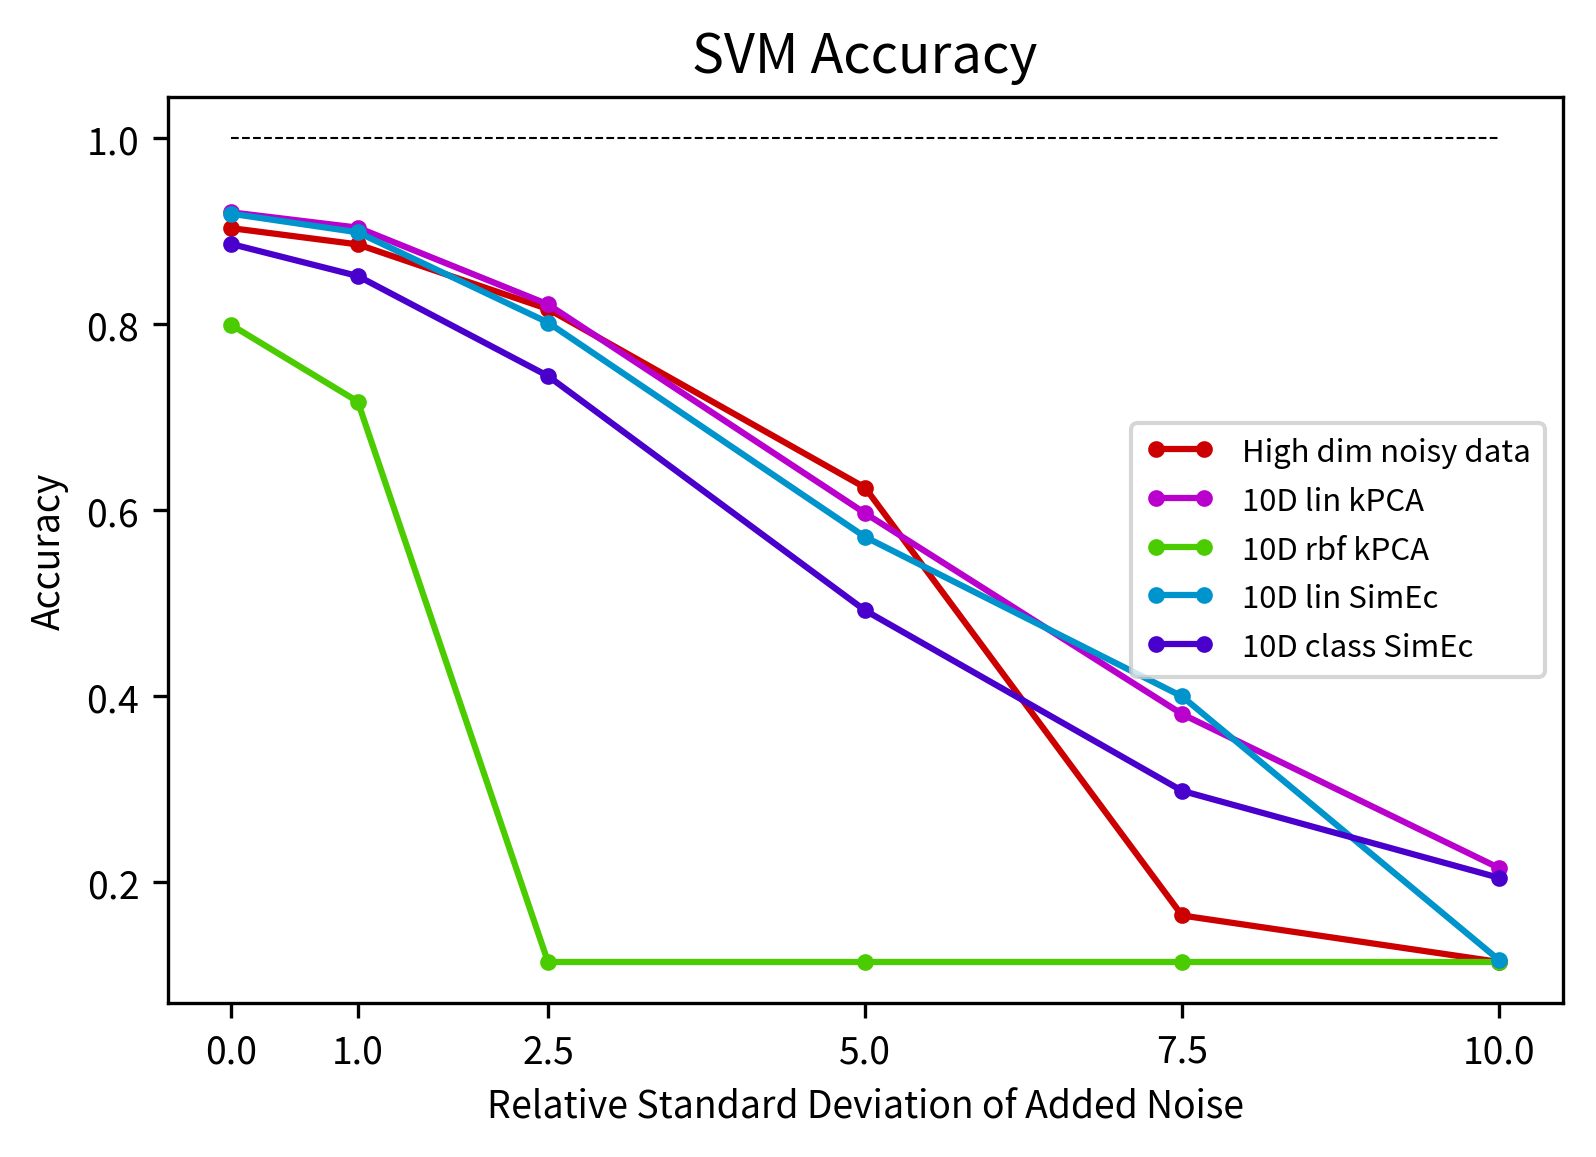

In [7]:
# add random noise to input
np.random.seed(15)
colors = get_colors(10)
noise_levels = [0., 1., 2.5, 5., 7.5, 10.]
acc_original = []
acc_lin_kpca = []
acc_rbf_kpca = []
acc_lin_simec = []
acc_class_simec = []
noise_train = np.random.randn(*X.shape)
noise_train = x_std*noise_train/np.std(noise_train)
noise_test = np.random.randn(*X_test.shape)
noise_test = x_std*noise_test/np.std(noise_test)
for noise_level in noise_levels:
    print "noise_level: %.1f" % noise_level
    # add random noise to X and X_test
    X_noisy = X + noise_level*noise_train
    X_test_noisy = X_test + noise_level*noise_test
    # compute embeddings and classification accuracy
    clf = SVC(random_state=42)
    clf.fit(X_noisy, y)
    acc_original.append(clf.score(X_test_noisy, y_test))
    print "acc original: %.5f" % acc_original[-1]
    # lin kpca
    kpca = KernelPCA(n_components=10, kernel='linear')
    X_embed = kpca.fit_transform(X_noisy)
    X_embed_test = kpca.transform(X_test_noisy)
    clf = SVC(random_state=42)
    clf.fit(X_embed, y)
    acc_lin_kpca.append(clf.score(X_embed_test, y_test))
    print "acc lin kpca: %.5f" % acc_lin_kpca[-1]
    # rbf kpca
    kpca = KernelPCA(n_components=10, kernel='rbf', gamma=2.*gamma)
    X_embed = kpca.fit_transform(X_noisy)
    X_embed_test = kpca.transform(X_test_noisy)
    clf = SVC(random_state=42)
    clf.fit(X_embed, y)
    acc_rbf_kpca.append(clf.score(X_embed_test, y_test))
    print "acc rbf kpca: %.5f" % acc_rbf_kpca[-1]
    # lin simec
    simec = SimilarityEncoder(X_noisy.shape[1], 10, n_targets, l2_reg_emb=0.001, l2_reg_out=0.000001, s_ll_reg=0.5, S_ll=K_lin[:n_targets, :n_targets])
    simec.fit(X_noisy, K_lin[:, :n_targets])
    X_embed = simec.transform(X_noisy)
    X_embed_test = simec.transform(X_test_noisy)
    clf = SVC(random_state=42)
    clf.fit(X_embed, y)
    acc_lin_simec.append(clf.score(X_embed_test, y_test))
    print "acc lin simec: %.5f" % acc_lin_simec[-1]
    # class simec
    simec = SimilarityEncoder(X_noisy.shape[1], 10, n_targets,  hidden_layers=[(10, 'tanh')], l2_reg=0.00001, l2_reg_emb=0.001, l2_reg_out=0.00001, s_ll_reg=1., S_ll=S[:n_targets, :n_targets], opt=keras.optimizers.Adamax(lr=0.0005))
    simec.fit(X_noisy, S[:, :n_targets])
    X_embed = simec.transform(X_noisy)
    X_embed_test = simec.transform(X_test_noisy)
    clf = SVC(random_state=42)
    clf.fit(X_embed, y)
    acc_class_simec.append(clf.score(X_embed_test, y_test))
    print "acc class simec: %.5f" % acc_class_simec[-1]
plt.figure();
plt.plot(noise_levels, acc_original, '-o', markersize=3, c=colors[0], label='High dim noisy data');
plt.plot(noise_levels, acc_lin_kpca, '-o', markersize=3, c=colors[-1], label='10D lin kPCA');
plt.plot(noise_levels, acc_rbf_kpca, '-o', markersize=3, c=colors[3], label='10D rbf kPCA');
plt.plot(noise_levels, acc_lin_simec, '-o', markersize=3, c=colors[6], label='10D lin SimEc');
plt.plot(noise_levels, acc_class_simec, '-o', markersize=3, c=colors[8], label='10D class SimEc');
plt.legend(loc=0);
plt.title('SVM accuracy');
plt.plot([0, noise_levels[-1]], [1,1], 'k--', linewidth=0.5);
plt.xticks(noise_levels, noise_levels);
plt.xlabel('Relative standard deviation of added noise')
plt.ylabel('Accuracy')

(784, 784)
(8000, 784)
(8000, 784)
(2000, 784)
(2000, 784)
noise_level: 0.0


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc original: 0.90350


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin kpca: 0.92050


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc rbf kpca: 0.79950
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 96.5766     
Epoch 2/25
8000/8000 [==============================] - 4s - loss: 63.6581     
Epoch 3/25
8000/8000 [==============================] - 4s - loss: 57.3036     
Epoch 4/25
8000/8000 [==============================] - 4s - loss: 54.4076     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 51.5909     
Epoch 6/25
8000/8000 [==============================] - 4s - loss: 46.4956     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 39.1389     
Epoch 8/25
8000/8000 [==============================] - 4s - loss: 31.9613     
Epoch 9/25
8000/8000 [==============================] - 4s - loss: 26.6649     
Epoch 10/25
8000/8000 [==============================] - 4s - loss: 23.0110     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 20.4707     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 18.8700     
Epoch 13/25
800

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin simec: 0.91900
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 0.1822     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1583     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1458     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1340     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1211     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1080     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.0952     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.0830     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0724     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0640     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0585     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0547     
Epoch 13/25
8000/8000 [===

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc class simec: 0.88300
noise_level: 1.0


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc original: 0.89150


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin kpca: 0.88850


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc rbf kpca: 0.72850
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 98.4825     
Epoch 2/25
8000/8000 [==============================] - 4s - loss: 64.1056     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 57.5064     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 54.2760     
Epoch 5/25
8000/8000 [==============================] - 4s - loss: 50.9868     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 45.2900     
Epoch 7/25
8000/8000 [==============================] - 4s - loss: 37.7662     
Epoch 8/25
8000/8000 [==============================] - 4s - loss: 31.0492     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 25.8385     
Epoch 10/25
8000/8000 [==============================] - 4s - loss: 22.0928     
Epoch 11/25
8000/8000 [==============================] - 4s - loss: 19.8974     
Epoch 12/25
8000/8000 [==============================] - 4s - loss: 18.6105     
Epoch 13/25
800

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin simec: 0.91800
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 0.1863     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1660     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1495     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1375     
Epoch 5/25
8000/8000 [==============================] - 4s - loss: 0.1258     
Epoch 6/25
8000/8000 [==============================] - 4s - loss: 0.1126     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.0984     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.0842     
Epoch 9/25
8000/8000 [==============================] - 4s - loss: 0.0718     
Epoch 10/25
8000/8000 [==============================] - 4s - loss: 0.0619     
Epoch 11/25
8000/8000 [==============================] - 4s - loss: 0.0552     
Epoch 12/25
8000/8000 [==============================] - 4s - loss: 0.0514     
Epoch 13/25
8000/8000 [===

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc class simec: 0.87350
noise_level: 2.5


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc original: 0.87400


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin kpca: 0.34950


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc rbf kpca: 0.11450
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 101.1545     
Epoch 2/25
8000/8000 [==============================] - 4s - loss: 64.7662     
Epoch 3/25
8000/8000 [==============================] - 4s - loss: 57.9791     
Epoch 4/25
8000/8000 [==============================] - 4s - loss: 52.9344     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 48.2938     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 41.3742     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 33.4776     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 27.5252     
Epoch 9/25
8000/8000 [==============================] - 4s - loss: 23.6266     
Epoch 10/25
8000/8000 [==============================] - 4s - loss: 21.1952     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 19.6509      ETA: 0s - loss: 1
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 18.6357  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin simec: 0.91950
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 0.1891     
Epoch 2/25
8000/8000 [==============================] - 4s - loss: 0.1737     
Epoch 3/25
8000/8000 [==============================] - 4s - loss: 0.1600     
Epoch 4/25
8000/8000 [==============================] - 4s - loss: 0.1492     
Epoch 5/25
8000/8000 [==============================] - 4s - loss: 0.1387     
Epoch 6/25
8000/8000 [==============================] - 4s - loss: 0.1252     
Epoch 7/25
8000/8000 [==============================] - 4s - loss: 0.1098     
Epoch 8/25
8000/8000 [==============================] - 4s - loss: 0.0942     
Epoch 9/25
8000/8000 [==============================] - 4s - loss: 0.0807     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0710     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0654     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0623     
Epoch 13/25
8000/8000 [===

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc class simec: 0.86400
noise_level: 5.0


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc original: 0.69000


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin kpca: 0.11600


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc rbf kpca: 0.11450
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 108.5743     
Epoch 2/25
8000/8000 [==============================] - 4s - loss: 67.2131     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 58.6249     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 52.1175     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 45.3834     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 37.1881     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 29.9867     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 25.2332     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 22.4984     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 21.1452     
Epoch 11/25
8000/8000 [==============================] - 4s - loss: 20.2293     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 19.7453     
Epoch 13/25
80

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin simec: 0.91550
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 0.1941     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1841     
Epoch 3/25
8000/8000 [==============================] - 4s - loss: 0.1708     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1580     
Epoch 5/25
8000/8000 [==============================] - 4s - loss: 0.1467     
Epoch 6/25
8000/8000 [==============================] - 4s - loss: 0.1343     
Epoch 7/25
8000/8000 [==============================] - 4s - loss: 0.1207     
Epoch 8/25
8000/8000 [==============================] - 4s - loss: 0.1070     
Epoch 9/25
8000/8000 [==============================] - 4s - loss: 0.0944     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0839     
Epoch 11/25
8000/8000 [==============================] - 4s - loss: 0.0761     
Epoch 12/25
8000/8000 [==============================] - 4s - loss: 0.0708     
Epoch 13/25
8000/8000 [===

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc class simec: 0.86300
noise_level: 7.5


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc original: 0.18500


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin kpca: 0.11300


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc rbf kpca: 0.11450
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 116.9536     
Epoch 2/25
8000/8000 [==============================] - 4s - loss: 74.8890     
Epoch 3/25
8000/8000 [==============================] - 4s - loss: 60.7575     
Epoch 4/25
8000/8000 [==============================] - 4s - loss: 54.3144     
Epoch 5/25
8000/8000 [==============================] - 4s - loss: 46.4861     
Epoch 6/25
8000/8000 [==============================] - 4s - loss: 38.7811     
Epoch 7/25
8000/8000 [==============================] - 4s - loss: 31.9660     
Epoch 8/25
8000/8000 [==============================] - 4s - loss: 27.3349     
Epoch 9/25
8000/8000 [==============================] - 4s - loss: 24.7089     
Epoch 10/25
8000/8000 [==============================] - 4s - loss: 22.9364     
Epoch 11/25
8000/8000 [==============================] - 4s - loss: 21.5831     
Epoch 12/25
8000/8000 [==============================] - 4s - loss: 21.1209     
Epoch 13/25
80

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin simec: 0.91350
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 0.1956     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1883     
Epoch 3/25
8000/8000 [==============================] - 4s - loss: 0.1827     
Epoch 4/25
8000/8000 [==============================] - 4s - loss: 0.1753     
Epoch 5/25
8000/8000 [==============================] - 4s - loss: 0.1677     
Epoch 6/25
8000/8000 [==============================] - 4s - loss: 0.1589     
Epoch 7/25
8000/8000 [==============================] - 4s - loss: 0.1481     
Epoch 8/25
8000/8000 [==============================] - 4s - loss: 0.1348     
Epoch 9/25
8000/8000 [==============================] - 4s - loss: 0.1195     
Epoch 10/25
8000/8000 [==============================] - 4s - loss: 0.1044     
Epoch 11/25
8000/8000 [==============================] - 4s - loss: 0.0921     
Epoch 12/25
8000/8000 [==============================] - 4s - loss: 0.0830     
Epoch 13/25
8000/8000 [===

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc class simec: 0.84800
noise_level: 10.0


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc original: 0.11450


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin kpca: 0.11450


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc rbf kpca: 0.11450
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 122.4767     
Epoch 2/25
8000/8000 [==============================] - 4s - loss: 81.4734     
Epoch 3/25
8000/8000 [==============================] - 4s - loss: 64.2360     
Epoch 4/25
8000/8000 [==============================] - 4s - loss: 56.4876     
Epoch 5/25
8000/8000 [==============================] - 4s - loss: 49.6117     
Epoch 6/25
8000/8000 [==============================] - 4s - loss: 41.7283     
Epoch 7/25
8000/8000 [==============================] - 4s - loss: 34.5975     
Epoch 8/25
8000/8000 [==============================] - 4s - loss: 29.4562     
Epoch 9/25
8000/8000 [==============================] - 4s - loss: 26.7444     
Epoch 10/25
8000/8000 [==============================] - 4s - loss: 24.6131     
Epoch 11/25
8000/8000 [==============================] - 4s - loss: 23.3966     
Epoch 12/25
8000/8000 [==============================] - 4s - loss: 22.7645     
Epoch 13/25
80

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin simec: 0.89600
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 0.1954     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1887     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1854     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1818     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1765     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1688     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.1591     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.1485     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.1358     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.1218     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.1077     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0949     
Epoch 13/25
8000/8000 [===

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc class simec: 0.82450


Text(0.5,1,u'SVM Accuracy')

([<matplotlib.axis.XTick at 0x24738bb50>,
 <a list of 6 Text xticklabel objects>)

Text(0.5,0,u'Relative Standard Deviation of Added Noise')

Text(0,0.5,u'Accuracy')

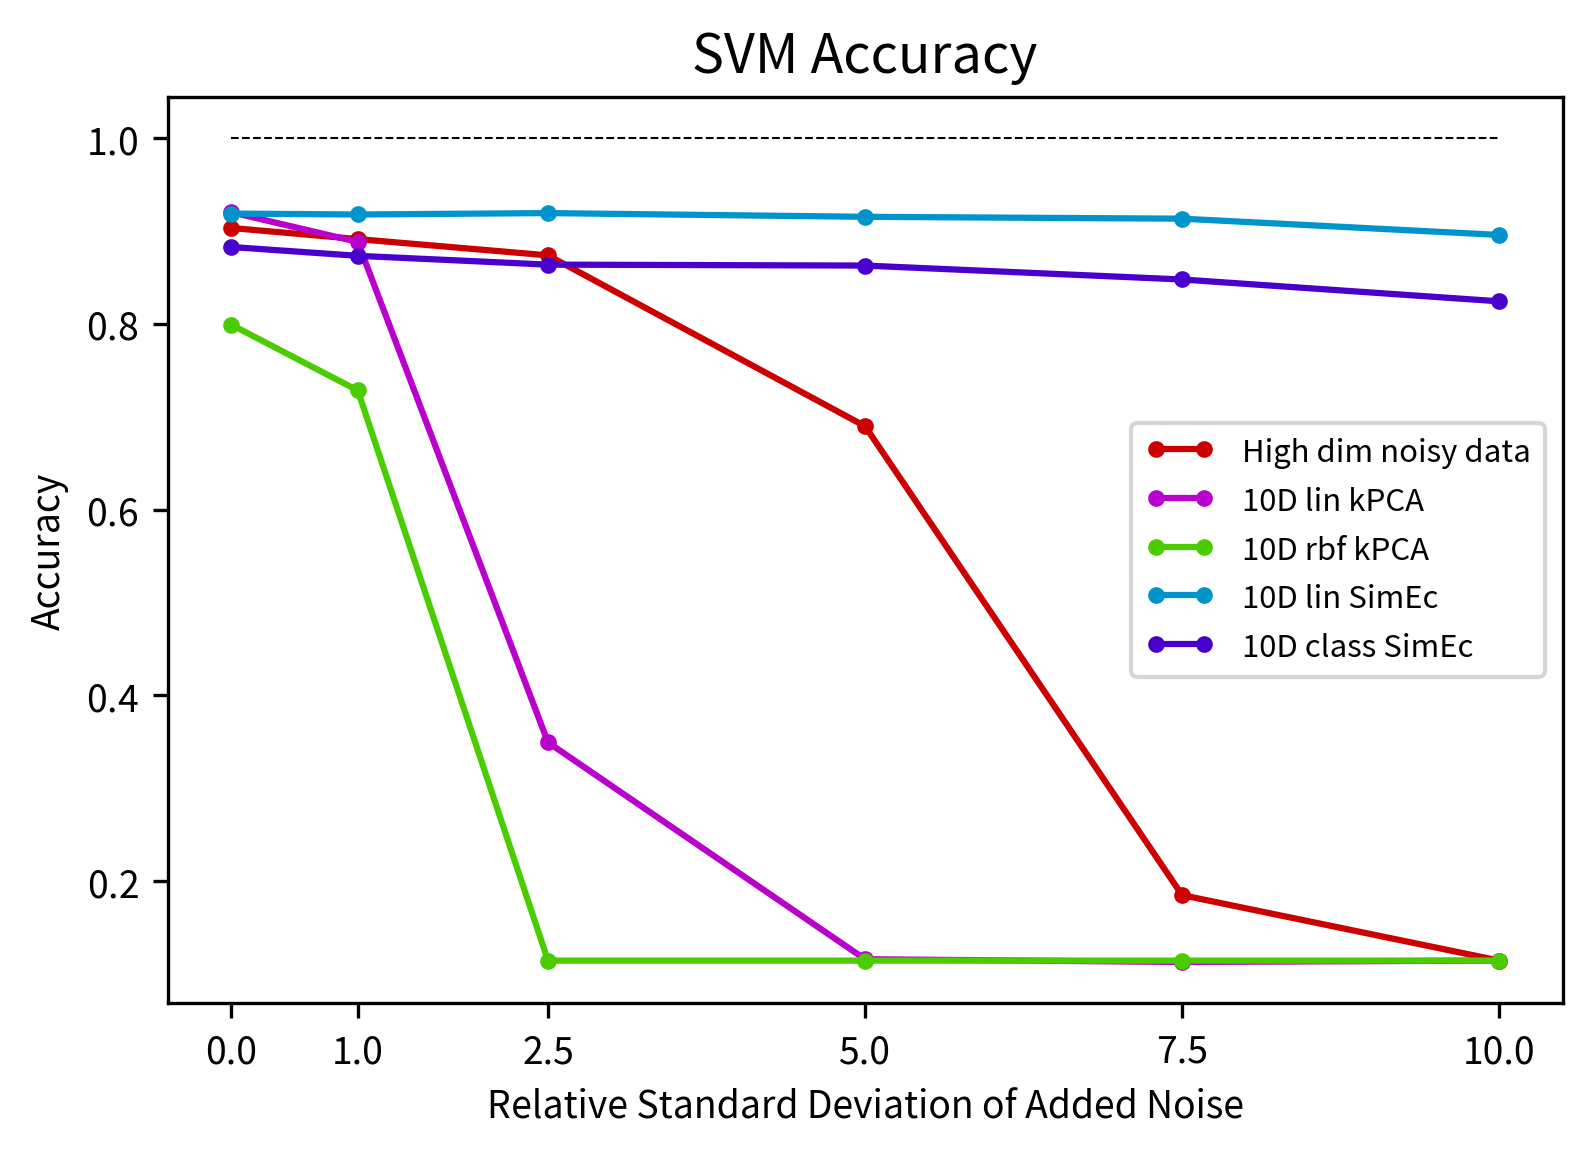

In [8]:
# add correlated noise to input data
np.random.seed(15)
colors = get_colors(10)
noise_levels = [0., 1., 2.5, 5., 7.5, 10.]
acc_original = []
acc_lin_kpca = []
acc_rbf_kpca = []
acc_lin_simec = []
acc_class_simec = []
# generate random covariance matrix
cov = np.random.randn(X.shape[1], X.shape[1])
cov = 0.33*(cov + cov.T + np.eye(X.shape[1]))
# make sure it's positive semidefinite
D, V = np.linalg.eig(cov)
D, V = D[np.argsort(D)[::-1]], V[:, np.argsort(D)[::-1]]
cov_embed = np.dot(V, np.diag(np.sqrt(np.abs(D))))
cov = np.dot(cov_embed[:,:100], cov_embed[:,:100].T)
# generate correlated noise data
noise_train = np.random.multivariate_normal(np.zeros(X.shape[1]), cov, X.shape[0])
noise_train = x_std*noise_train/np.std(noise_train)
noise_test = np.random.multivariate_normal(np.zeros(X_test.shape[1]), cov, X_test.shape[0])
noise_test = x_std*noise_test/np.std(noise_test)
for noise_level in noise_levels:
    print "noise_level: %.1f" % noise_level
    # add random noise to X and X_test
    X_noisy = X + noise_level*noise_train
    X_test_noisy = X_test + noise_level*noise_test
    # compute embeddings and classification accuracy
    clf = SVC(random_state=42)
    clf.fit(X_noisy, y)
    acc_original.append(clf.score(X_test_noisy, y_test))
    print "acc original: %.5f" % acc_original[-1]
    # lin kpca
    kpca = KernelPCA(n_components=10, kernel='linear')
    X_embed = kpca.fit_transform(X_noisy)
    X_embed_test = kpca.transform(X_test_noisy)
    clf = SVC(random_state=42)
    clf.fit(X_embed, y)
    acc_lin_kpca.append(clf.score(X_embed_test, y_test))
    print "acc lin kpca: %.5f" % acc_lin_kpca[-1]
    # rbf kpca
    kpca = KernelPCA(n_components=10, kernel='rbf', gamma=2.*gamma)
    X_embed = kpca.fit_transform(X_noisy)
    X_embed_test = kpca.transform(X_test_noisy)
    clf = SVC(random_state=42)
    clf.fit(X_embed, y)
    acc_rbf_kpca.append(clf.score(X_embed_test, y_test))
    print "acc rbf kpca: %.5f" % acc_rbf_kpca[-1]
    # lin simec
    simec = SimilarityEncoder(X_noisy.shape[1], 10, n_targets, l2_reg_emb=0.001, l2_reg_out=0.000001, s_ll_reg=0.5, S_ll=K_lin[:n_targets, :n_targets])
    simec.fit(X_noisy, K_lin[:, :n_targets])
    X_embed = simec.transform(X_noisy)
    X_embed_test = simec.transform(X_test_noisy)
    clf = SVC(random_state=42)
    clf.fit(X_embed, y)
    acc_lin_simec.append(clf.score(X_embed_test, y_test))
    print "acc lin simec: %.5f" % acc_lin_simec[-1]
    # class simec
    simec = SimilarityEncoder(X_noisy.shape[1], 10, n_targets,  hidden_layers=[(10, 'tanh')], l2_reg=0.00001, l2_reg_emb=0.001, l2_reg_out=0.00001, s_ll_reg=1., S_ll=S[:n_targets, :n_targets], opt=keras.optimizers.Adamax(lr=0.0005))
    simec.fit(X_noisy, S[:, :n_targets])
    X_embed = simec.transform(X_noisy)
    X_embed_test = simec.transform(X_test_noisy)
    clf = SVC(random_state=42)
    clf.fit(X_embed, y)
    acc_class_simec.append(clf.score(X_embed_test, y_test))
    print "acc class simec: %.5f" % acc_class_simec[-1]
plt.figure();
plt.plot(noise_levels, acc_original, '-o', markersize=3, c=colors[0], label='High dim noisy data');
plt.plot(noise_levels, acc_lin_kpca, '-o', markersize=3, c=colors[-1], label='10D lin kPCA');
plt.plot(noise_levels, acc_rbf_kpca, '-o', markersize=3, c=colors[3], label='10D rbf kPCA');
plt.plot(noise_levels, acc_lin_simec, '-o', markersize=3, c=colors[6], label='10D lin SimEc');
plt.plot(noise_levels, acc_class_simec, '-o', markersize=3, c=colors[8], label='10D class SimEc');
plt.legend(loc=0);
plt.title('SVM accuracy');
plt.plot([0, noise_levels[-1]], [1,1], 'k--', linewidth=0.5);
plt.xticks(noise_levels, noise_levels);
plt.xlabel('Relative standard deviation of added noise')
plt.ylabel('Accuracy')

noise dimensions: 0
(8000, 784)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc original: 0.90350


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin kpca: 0.92050


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc rbf kpca: 0.80700
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 95.6754     
Epoch 2/25
8000/8000 [==============================] - 4s - loss: 62.2788     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 57.0517     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 54.2885     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 51.1216     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 45.6575     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 38.0565     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 30.8689     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 25.3630     
Epoch 10/25
8000/8000 [==============================] - 4s - loss: 21.6306     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 19.3231     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 17.9439     
Epoch 13/25
800

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin simec: 0.91900
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 0.1824     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1629     
Epoch 3/25
8000/8000 [==============================] - 4s - loss: 0.1486     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1358     
Epoch 5/25
8000/8000 [==============================] - 4s - loss: 0.1221     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1059     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.0903     
Epoch 8/25
8000/8000 [==============================] - 4s - loss: 0.0768     
Epoch 9/25
8000/8000 [==============================] - 4s - loss: 0.0662     
Epoch 10/25
8000/8000 [==============================] - 4s - loss: 0.0587     
Epoch 11/25
8000/8000 [==============================] - 4s - loss: 0.0539     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0503     
Epoch 13/25
8000/8000 [===

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc class simec: 0.88750
noise dimensions: 784
(8000, 1568)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc original: 0.88700


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin kpca: 0.92150


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc rbf kpca: 0.79100
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 94.8928     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 63.3538     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 57.0452     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 54.3999     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 51.3062     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 45.8006     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 38.1865     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 31.1343     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 25.9769     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 22.2922     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 19.9158     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 18.5209     
Epoch 13/25
800

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin simec: 0.91800
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 0.1835     
Epoch 2/25
8000/8000 [==============================] - 4s - loss: 0.1618     
Epoch 3/25
8000/8000 [==============================] - 4s - loss: 0.1487     
Epoch 4/25
8000/8000 [==============================] - 4s - loss: 0.1364     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1242     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1098     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.0944     
Epoch 8/25
8000/8000 [==============================] - 4s - loss: 0.0810     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0703     
Epoch 10/25
8000/8000 [==============================] - 4s - loss: 0.0621     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0562     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0517     
Epoch 13/25
8000/8000 [===

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc class simec: 0.86250
noise dimensions: 1568
(8000, 2352)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc original: 0.87800


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin kpca: 0.92050


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc rbf kpca: 0.75000
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 96.5749     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 64.0230     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 58.0075     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 55.2529     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 52.0634     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 46.7702     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 39.7431     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 33.2197     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 28.1761     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 24.3899     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 21.8324     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 20.2282     
Epoch 13/25
800

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin simec: 0.92000
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 0.1839     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1632     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1499     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1380     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1257     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1117     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.0976     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.0843     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0731     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0646     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0571     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0507     
Epoch 13/25
8000/8000 [===

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc class simec: 0.83850
noise dimensions: 3136
(8000, 3920)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc original: 0.86950


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin kpca: 0.92100


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc rbf kpca: 0.33350
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 95.9504     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 63.8479     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 57.3702     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 54.4728     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 51.6228     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 46.9349     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 40.1865     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 33.6063     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 28.7036     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 25.2283     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 22.7889     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 21.1990     
Epoch 13/25
800

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin simec: 0.91400
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 0.1851     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1635     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1488     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1361     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1216     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1051     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.0892     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.0765     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0670     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0585     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0501     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0435     
Epoch 13/25
8000/8000 [===

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc class simec: 0.80500
noise dimensions: 4704
(8000, 5488)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc original: 0.86000


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin kpca: 0.92100


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc rbf kpca: 0.11450
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 95.2616     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 64.3760     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 57.7225     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 54.5799     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 51.9279     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 47.7574     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 41.6912     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 35.3877     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 30.4757     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 27.0378     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 24.4247     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 22.8236     
Epoch 13/25
800

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin simec: 0.91550
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 0.1825     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1597     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1465     - ETA: 0s - loss:
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1326     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1162     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.0998     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.0837     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.0700     
Epoch 9/25
8000/8000 [==============================] - 6s - loss: 0.0591     
Epoch 10/25
8000/8000 [==============================] - 6s - loss: 0.0495     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0415     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0360     
Epoch 13/

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc class simec: 0.76750
noise dimensions: 6272
(8000, 7056)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc original: 0.85150


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin kpca: 0.92050


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc rbf kpca: 0.11450
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 95.1535     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 63.2101     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 56.8993     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 54.2960     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 51.7399     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 47.7980      ETA: 0s - loss: 48. - ETA
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 42.0298     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 36.1634     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 31.4093     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 28.0681     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 25.8534     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 24

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin simec: 0.90450
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 0.1847     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1627     - ETA: 0s 
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1458     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1306     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1143     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.0974     - ETA: 0s - loss: 0.097
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.0793     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.0616     - ETA: 2s - los
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0482     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0402     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0352     - ETA: 0s - loss
Epoch 12/25
8000/8000 [===================

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc class simec: 0.73950
noise dimensions: 7840
(8000, 8624)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc original: 0.83650


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin kpca: 0.92150


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc rbf kpca: 0.11450
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 95.7903     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 64.1621     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 58.7813     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 55.3950     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 53.0509     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 50.1953     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 45.5701     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 40.2225     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 35.2513     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 31.4246     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 28.6293     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 26.6052     
Epoch 13/25
800

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin simec: 0.88950
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 0.1839     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1616     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1467     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1325     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1162     - ETA: 0s - 
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.0974     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.0783     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.0623     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0499     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0406     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0337     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0288     
Epoch 13/25
80

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc class simec: 0.72400


Text(0.5,1,u'SVM Accuracy')

([<matplotlib.axis.XTick at 0x26e1d1e90>,
 <a list of 7 Text xticklabel objects>)

Text(0.5,0,u'Additional Noise Dimensions (where $D = 784$)')

Text(0,0.5,u'Accuracy')

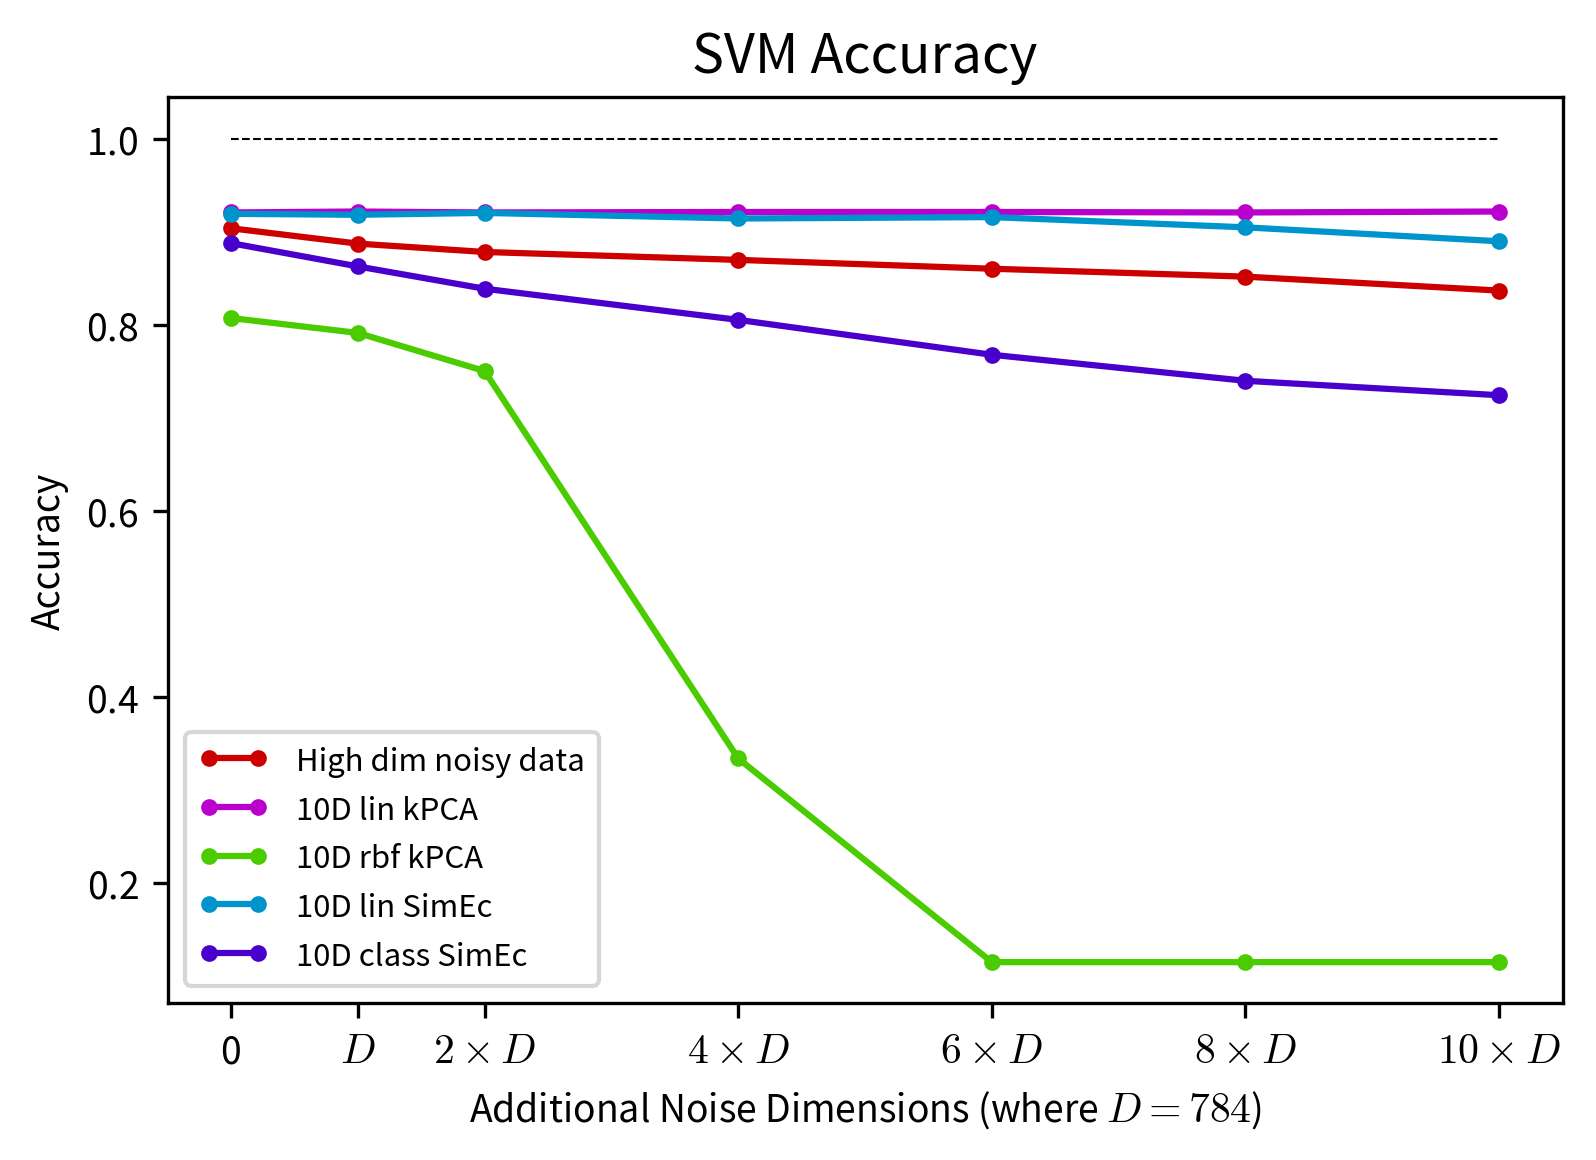

In [9]:
# add additional input dimensions with random noise
np.random.seed(15)
colors = get_colors(10)
noise_levels = [0, X.shape[1], 2*X.shape[1], 4*X.shape[1], 6*X.shape[1], 8*X.shape[1], 10*X.shape[1]]
acc_original = []
acc_lin_kpca = []
acc_rbf_kpca = []
acc_lin_simec = []
acc_class_simec = []
noise_train = np.random.randn(X.shape[0], max(noise_levels))
noise_train = x_std*noise_train/np.std(noise_train)
noise_test = np.random.randn(X_test.shape[0], max(noise_levels))
noise_test = x_std*noise_test/np.std(noise_test)
for noise_level in noise_levels:
    print "noise dimensions: %i" % noise_level
    # add random noise as additional feature dimensions
    X_noisy = np.hstack((X, noise_train[:,:noise_level]))
    X_test_noisy = np.hstack((X_test, noise_test[:,:noise_level]))
    # compute embeddings and classification accuracy
    clf = SVC(random_state=42)
    clf.fit(X_noisy, y)
    acc_original.append(clf.score(X_test_noisy, y_test))
    print "acc original: %.5f" % acc_original[-1]
    # lin kpca
    kpca = KernelPCA(n_components=10, kernel='linear')
    X_embed = kpca.fit_transform(X_noisy)
    X_embed_test = kpca.transform(X_test_noisy)
    clf = SVC(random_state=42)
    clf.fit(X_embed, y)
    acc_lin_kpca.append(clf.score(X_embed_test, y_test))
    print "acc lin kpca: %.5f" % acc_lin_kpca[-1]
    # rbf kpca
    kpca = KernelPCA(n_components=10, kernel='rbf', gamma=gamma)
    X_embed = kpca.fit_transform(X_noisy)
    X_embed_test = kpca.transform(X_test_noisy)
    clf = SVC(random_state=42)
    clf.fit(X_embed, y)
    acc_rbf_kpca.append(clf.score(X_embed_test, y_test))
    print "acc rbf kpca: %.5f" % acc_rbf_kpca[-1]
    # lin simec
    simec = SimilarityEncoder(X_noisy.shape[1], 10, n_targets, l2_reg_emb=0.001, l2_reg_out=0.000001, s_ll_reg=0.5, S_ll=K_lin[:n_targets, :n_targets])
    simec.fit(X_noisy, K_lin[:, :n_targets])
    X_embed = simec.transform(X_noisy)
    X_embed_test = simec.transform(X_test_noisy)
    clf = SVC(random_state=42)
    clf.fit(X_embed, y)
    acc_lin_simec.append(clf.score(X_embed_test, y_test))
    print "acc lin simec: %.5f" % acc_lin_simec[-1]
    # class simec
    simec = SimilarityEncoder(X_noisy.shape[1], 10, n_targets,  hidden_layers=[(10, 'tanh')], l2_reg=0.00001, l2_reg_emb=0.001, l2_reg_out=0.00001, s_ll_reg=1., S_ll=S[:n_targets, :n_targets], opt=keras.optimizers.Adamax(lr=0.0005))
    simec.fit(X_noisy, S[:, :n_targets])
    X_embed = simec.transform(X_noisy)
    X_embed_test = simec.transform(X_test_noisy)
    clf = SVC(random_state=42)
    clf.fit(X_embed, y)
    acc_class_simec.append(clf.score(X_embed_test, y_test))
    print "acc class simec: %.5f" % acc_class_simec[-1]
plt.figure();
plt.plot(noise_levels, acc_original, '-o', markersize=3, c=colors[0], label='High dim noisy data');
plt.plot(noise_levels, acc_lin_kpca, '-o', markersize=3, c=colors[-1], label='10D lin kPCA');
plt.plot(noise_levels, acc_rbf_kpca, '-o', markersize=3, c=colors[3], label='10D rbf kPCA');
plt.plot(noise_levels, acc_lin_simec, '-o', markersize=3, c=colors[6], label='10D lin SimEc');
plt.plot(noise_levels, acc_class_simec, '-o', markersize=3, c=colors[8], label='10D class SimEc');
plt.legend(loc=0);
plt.title('SVM accuracy');
plt.plot([0, noise_levels[-1]], [1,1], 'k--', linewidth=0.5);
plt.xticks(noise_levels, [0, '$D$', '$2\\times D$', '$4\\times D$', '$6\\times D$', '$8\\times D$', '$10\\times D$']);
plt.xlabel('Additional noise dimensions (where $D = 784$)')
plt.ylabel('Accuracy')

(7840, 7840)
(8000, 784)
(8000, 7840)
(2000, 784)
(2000, 7840)
noise dimensions: 0
(8000, 784)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc original: 0.90350


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin kpca: 0.92050


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc rbf kpca: 0.80700
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 94.0575     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 62.2301     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 57.2716     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 54.3629     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 50.9765      ETA: 0s - loss: 5
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 45.3016     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 37.7023     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 30.8304     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 25.5970     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 21.7732     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 19.3019     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 17.9283   

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin simec: 0.91850
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 0.1819     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1593     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1449     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1329     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1194     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1037     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.0882     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.0755     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0665     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0608     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0565     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0523     
Epoch 13/25
8000/8000 [===

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc class simec: 0.87900
noise dimensions: 784
(8000, 1568)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc original: 0.88700


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin kpca: 0.91850


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc rbf kpca: 0.78600
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 95.6454     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 63.2859     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 56.5271     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 54.1378     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 51.1934     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 45.8171     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 38.1309     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 30.8811     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 25.7602     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 22.3611     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 20.1203     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 18.6582     
Epoch 13/25
800

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin simec: 0.92050
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 0.1814     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1599     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1459     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1313     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1174     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1032     
Epoch 7/25
8000/8000 [==============================] - 6s - loss: 0.0896     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.0779     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0685     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0618     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0569     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0523     
Epoch 13/25
8000/8000 [===

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc class simec: 0.87500
noise dimensions: 1568
(8000, 2352)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc original: 0.87650


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin kpca: 0.85300


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc rbf kpca: 0.73000
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 95.5049     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 63.0357     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 57.1558     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 54.5236     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 51.1696     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 45.5510     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 38.0107     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 31.0782     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 26.0142     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 22.5319     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 20.2704     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 19.1437     
Epoch 13/25
800

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin simec: 0.92050
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 0.1796     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1572     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1399     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1253     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1112     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.0966     
Epoch 7/25
8000/8000 [==============================] - 6s - loss: 0.0833     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.0721     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0628     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0552     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0499     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0474     
Epoch 13/25
8000/8000 [===

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc class simec: 0.87650
noise dimensions: 3136
(8000, 3920)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc original: 0.85850


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin kpca: 0.58450


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc rbf kpca: 0.32350
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 97.8576     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 65.1494     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 58.2941     
Epoch 4/25
8000/8000 [==============================] - 6s - loss: 55.1994      E
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 52.4739     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 48.2652     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 41.9855     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 35.3834     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 29.7978     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 25.9005     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 23.0844     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 21.4042     
Epoch 13/25
8

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin simec: 0.91800
Epoch 1/25
8000/8000 [==============================] - 6s - loss: 0.1818     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1598     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1439     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1300     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1155     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1008     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.0873     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.0760     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0674     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0613     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0561     
Epoch 12/25
8000/8000 [==============================] - 6s - loss: 0.0516     
Epoch 13/25
8000/8000 [===

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc class simec: 0.87750
noise dimensions: 4704
(8000, 5488)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc original: 0.84050


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin kpca: 0.31850


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc rbf kpca: 0.11450
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 96.3639     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 65.5166     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 57.5899     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 54.6717     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 52.2191     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 48.0476     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 41.7170     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 35.1812     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 30.1950     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 26.7900     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 24.2263     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 22.1521     
Epoch 13/25
800

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin simec: 0.91600
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 0.1810     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1625     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1508     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1383     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1242     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1081     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.0918     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.0778     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0676     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0614     
Epoch 11/25
8000/8000 [==============================] - 5s - loss: 0.0571     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0531     
Epoch 13/25
8000/8000 [===

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc class simec: 0.87600
noise dimensions: 6272
(8000, 7056)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc original: 0.82500


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin kpca: 0.21400


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc rbf kpca: 0.11450
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 96.5025     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 64.2039     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 57.8963     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 55.2217     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 53.0793     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 49.4420      ETA
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 43.4844     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 37.0870     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 31.9272     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 27.9529     
Epoch 11/25
8000/8000 [==============================] - 6s - loss: 25.1360     
Epoch 12/25
8000/8000 [==============================] - 6s - loss: 24.0143     
Epoch 13/25

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin simec: 0.89900
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 0.1819     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1620     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1472     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1341     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1201     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1038     
Epoch 7/25
8000/8000 [==============================] - ETA: 0s - loss: 0.087 - 5s - loss: 0.0877     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.0744     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0647     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0589     
Epoch 11/25
8000/8000 [==============================] - 6s - loss: 0.0555     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 0.0528     
Ep

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc class simec: 0.87700
noise dimensions: 7840
(8000, 8624)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc original: 0.81300


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin kpca: 0.10350


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc rbf kpca: 0.11450
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 99.7090     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 66.4065     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 57.6800     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 55.1442     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 53.5097     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 50.5069     
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 45.9041     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 40.2023     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 35.2728     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 30.7108     
Epoch 11/25
8000/8000 [==============================] - 6s - loss: 28.1601     
Epoch 12/25
8000/8000 [==============================] - 5s - loss: 25.8864     
Epoch 13/25
800

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc lin simec: 0.90250
Epoch 1/25
8000/8000 [==============================] - 7s - loss: 0.1826     
Epoch 2/25
8000/8000 [==============================] - 5s - loss: 0.1615     
Epoch 3/25
8000/8000 [==============================] - 5s - loss: 0.1483     
Epoch 4/25
8000/8000 [==============================] - 5s - loss: 0.1378     
Epoch 5/25
8000/8000 [==============================] - 5s - loss: 0.1274     
Epoch 6/25
8000/8000 [==============================] - 5s - loss: 0.1152     - E
Epoch 7/25
8000/8000 [==============================] - 5s - loss: 0.1013     
Epoch 8/25
8000/8000 [==============================] - 5s - loss: 0.0872     
Epoch 9/25
8000/8000 [==============================] - 5s - loss: 0.0751     
Epoch 10/25
8000/8000 [==============================] - 5s - loss: 0.0657     -
Epoch 11/25
8000/8000 [==============================] - 6s - loss: 0.0577     
Epoch 12/25
8000/8000 [==============================] - 6s - loss: 0.0520     
Epoch 13/25
8000/8000 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

acc class simec: 0.87300


Text(0.5,1,u'SVM Accuracy')

([<matplotlib.axis.XTick at 0x2b764afd0>,
 <a list of 7 Text xticklabel objects>)

Text(0.5,0,u'Additional Noise Dimensions (where $D = 784$)')

Text(0,0.5,u'Accuracy')

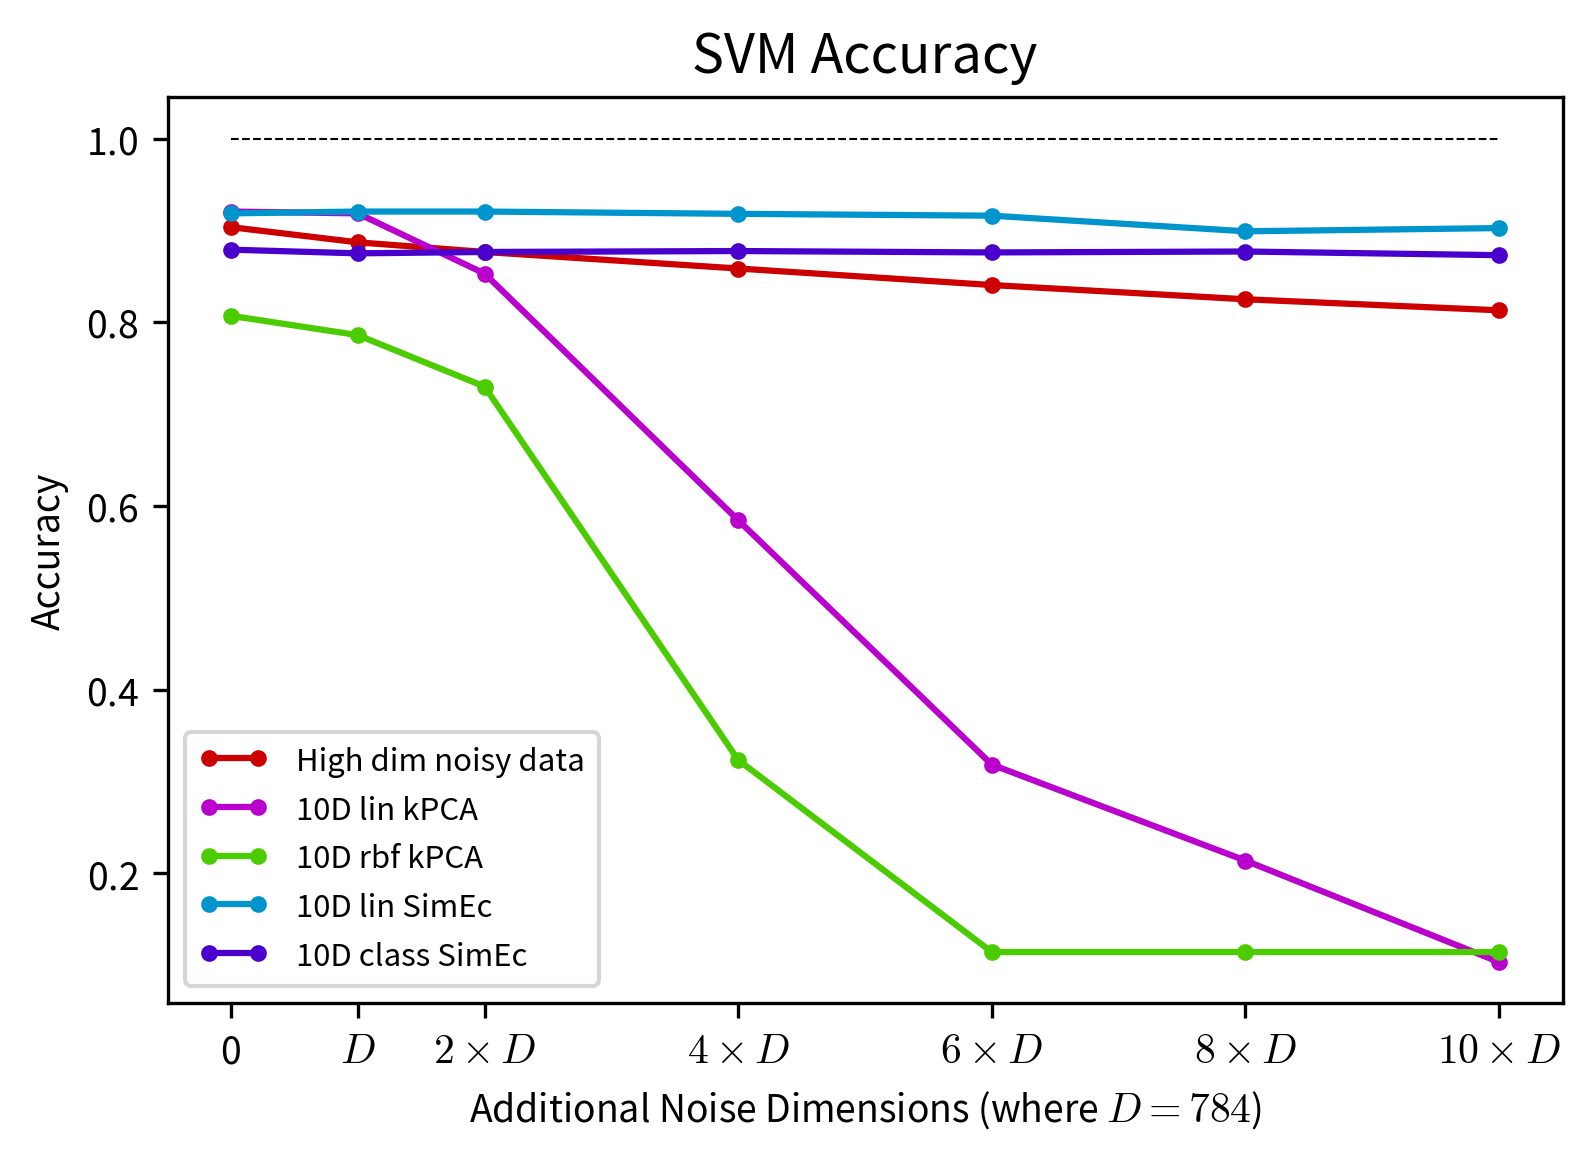

In [10]:
# add additional input dimensions with correlated noise
np.random.seed(15)
colors = get_colors(10)
noise_levels = [0, X.shape[1], 2*X.shape[1], 4*X.shape[1], 6*X.shape[1], 8*X.shape[1], 10*X.shape[1]]
acc_original = []
acc_lin_kpca = []
acc_rbf_kpca = []
acc_lin_simec = []
acc_class_simec = []
# generate random covariance matrix
cov = np.random.randn(max(noise_levels), max(noise_levels))
cov = 0.33*(cov + cov.T + np.eye(max(noise_levels)))
# make sure it's positive semidefinite
D, V = np.linalg.eig(cov)
D, V = D[np.argsort(D)[::-1]], V[:, np.argsort(D)[::-1]]
cov_embed = np.dot(V, np.diag(np.sqrt(np.abs(D))))
cov = np.dot(cov_embed[:,:100], cov_embed[:,:100].T)
# generate correlated noise data
noise_train = np.random.multivariate_normal(np.zeros(max(noise_levels)), cov, X.shape[0])
noise_train = x_std*noise_train/np.std(noise_train)
noise_test = np.random.multivariate_normal(np.zeros(max(noise_levels)), cov, X_test.shape[0])
noise_test = x_std*noise_test/np.std(noise_test)
for noise_level in noise_levels:
    print "noise dimensions: %i" % noise_level
    # add random noise as additional feature dimensions
    X_noisy = np.hstack((X, noise_train[:,:noise_level]))
    X_test_noisy = np.hstack((X_test, noise_test[:,:noise_level]))
    # compute embeddings and classification accuracy
    clf = SVC(random_state=42)
    clf.fit(X_noisy, y)
    acc_original.append(clf.score(X_test_noisy, y_test))
    print "acc original: %.5f" % acc_original[-1]
    # lin kpca
    kpca = KernelPCA(n_components=10, kernel='linear')
    X_embed = kpca.fit_transform(X_noisy)
    X_embed_test = kpca.transform(X_test_noisy)
    clf = SVC(random_state=42)
    clf.fit(X_embed, y)
    acc_lin_kpca.append(clf.score(X_embed_test, y_test))
    print "acc lin kpca: %.5f" % acc_lin_kpca[-1]
    # rbf kpca
    kpca = KernelPCA(n_components=10, kernel='rbf', gamma=gamma)
    X_embed = kpca.fit_transform(X_noisy)
    X_embed_test = kpca.transform(X_test_noisy)
    clf = SVC(random_state=42)
    clf.fit(X_embed, y)
    acc_rbf_kpca.append(clf.score(X_embed_test, y_test))
    print "acc rbf kpca: %.5f" % acc_rbf_kpca[-1]
    # lin simec
    simec = SimilarityEncoder(X_noisy.shape[1], 10, n_targets, l2_reg_emb=0.001, l2_reg_out=0.000001, s_ll_reg=0.5, S_ll=K_lin[:n_targets, :n_targets])
    simec.fit(X_noisy, K_lin[:, :n_targets])
    X_embed = simec.transform(X_noisy)
    X_embed_test = simec.transform(X_test_noisy)
    clf = SVC(random_state=42)
    clf.fit(X_embed, y)
    acc_lin_simec.append(clf.score(X_embed_test, y_test))
    print "acc lin simec: %.5f" % acc_lin_simec[-1]
    # class simec
    simec = SimilarityEncoder(X_noisy.shape[1], 10, n_targets,  hidden_layers=[(10, 'tanh')], l2_reg=0.00001, l2_reg_emb=0.001, l2_reg_out=0.00001, s_ll_reg=1., S_ll=S[:n_targets, :n_targets], opt=keras.optimizers.Adamax(lr=0.0005))
    simec.fit(X_noisy, S[:, :n_targets])
    X_embed = simec.transform(X_noisy)
    X_embed_test = simec.transform(X_test_noisy)
    clf = SVC(random_state=42)
    clf.fit(X_embed, y)
    acc_class_simec.append(clf.score(X_embed_test, y_test))
    print "acc class simec: %.5f" % acc_class_simec[-1]
plt.figure();
plt.plot(noise_levels, acc_original, '-o', markersize=3, c=colors[0], label='High dim noisy data');
plt.plot(noise_levels, acc_lin_kpca, '-o', markersize=3, c=colors[-1], label='10D lin kPCA');
plt.plot(noise_levels, acc_rbf_kpca, '-o', markersize=3, c=colors[3], label='10D rbf kPCA');
plt.plot(noise_levels, acc_lin_simec, '-o', markersize=3, c=colors[6], label='10D lin SimEc');
plt.plot(noise_levels, acc_class_simec, '-o', markersize=3, c=colors[8], label='10D class SimEc');
plt.legend(loc=0);
plt.title('SVM accuracy');
plt.plot([0, noise_levels[-1]], [1,1], 'k--', linewidth=0.5);
plt.xticks(noise_levels, [0, '$D$', '$2\\times D$', '$4\\times D$', '$6\\times D$', '$8\\times D$', '$10\\times D$']);
plt.xlabel('Additional noise dimensions (where $D = 784$)')
plt.ylabel('Accuracy')